# TC6004 Machine Learning
# Supervised Classification, Imbalanced Learning, and Comparative Model Evaluation

---

**Authors:** Team 3: Alan Gabriel Romero Pacheco & Mauricio Andrés Flores Pérez & Ángel Israel Hernández García & Jie Dong & Gerardo Ulises Arroyo Avendaño

**Course:** TC6004 Machine Learning

**Date:** February 2026

## 2. Executive Summary

In this notebook, we will analyize four different datasets for supervised classification. It is intented to follow a reproducible and standarized methodology for data science. In addition, one of the objectives of the following notebook is to show the differences in analysis for different types of datasets (balanced and imbalanced) along with different classifiers and metrics.

### 2.1 Datasets

The datasets chosen are the following ones:

* Balanced
  * Iris dataset
  * Mushroom dataset
* Imbalanced
  * Bank churners dataset
  * Credit risk dataset

In the following paragraphs, we will give a brief description of each of the datasets and the reason why they were chosen


#### 2.1.1 Iris Dataset

This dataset contains three iris species with 50 samples each. Each sample has 4 different properties about the flower.

The variables are:

* **SepalLengthCm**
* **SepalWidthCm**
* **PetalLengthCm**
* **PetalWidthCm**

And the target variable is:

* **Species:** Species name

The goal is to predict the iris species based on the four variables described previously.

This dataset is perfect balanced (50/50/50). The problem is a 3-class classification problem with 150 samples.

#### 2.1.2 Mushroom Dataset

This dataset contains descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms. The mushrooms belongs to the Agaricus and Lepiota Family drawn from The audubon Society Field Guide to North American Mushrooms (1981). Each sample can be identified as edible or poisonous.

The dataset contains 23 different variables and the objective is to predict whether a mushroom is edible or not.

This dataset is as well pretty well balanced. It is near perfect balanced (51.8%/48.2%). The problem is a binary classification problem and it contains 8,124 samples.

#### 2.1.3 Bank Churners Dataset

This dataset was collected from bank customers. It is data from current customers and customers that have left the bank (aka customer "churn"). The dataset contains 19 variables that are the following. We will just add the description to the ones that are difficult to understand or where its meaning might be a little bit obscure.

* **id**
* **Customer_age**
* **Dependent_count:** Number of dependents claimed on taxes
* **Education_Level**
* **Marital_status**
* **Income_Category:** These are binned to specific values
* **Card_Category:** Level of credit card - Blue, Silver, etc.
* **Months_on_book:** Number of complete months that have elapsed since credit incurred
* **Total_Relationship_Count:** Total number of products held by the customers (accounts, etc.)
* **Months_Inactive_12_mon:** Number of months the customer was inactive in the last 12 months
* **Contacts_count_12_month:** Number of times the bank contacted the customer and/or vice-versa.
* **Credit_Limit:** Credit limit
* **Total_Revolving_Bal:** Portion credit card balance that goes unpaid at the end of cycle
* **Avg_Open_To_Buy:** difference Between the credit limit assigned to a cardholder account and the present Balance on the account
* **Total_Amt_Chng_Q4_Q1:** Represents how much the customer increased their expenditure when comparing the 4th quarter agains the 1st.
* **Total_Trans_Amt:** Total amount of transactions
* **Total_Trans_Ct:** Similar to previous but in number of transactions
* **Total_Ct_Chng_Q4_Q1:** Similar to Total_Amt_Chng_Q4_Q1 but in number of transactions.
* **Avg_Utilization_Ratio:** Represents how much of the available credit the customer spent (sometimes used to calculate credit score).

The objective is to predict if a customer will stay or left.

This dataset is moderate imbalanced (5.22:1 ratio). The problem is a binary classification problem and it contains 10,127 samples.

#### 2.1.4 Credit Risk Dataset

This dataset was created to simulate a real-world credit risk classification problem under extrem class imbalance. The dataset contains both numerical and categorical features with realistic correlationes, subtle leakage-style signals, and controlled label noise. The objective of this dataset is to analyze if giving the credit is considered high risk or low risk.

It contains 12 predictor variables that are the following ones. In this case, we will add the description just to the variables where its name might not convey the whole meaning of the variable:

* **age**
* **monthly_income**
* **debt_ration:** Usually calculated as Total Monthly Debt Payments ÷ Gross Monthly Income.
* **credit_utilization:** It is the ratio of Total Balance Owed ÷ Total Credit Limit.
* **transaction_counts:** The total number of transactions over a set period.
* **avg_transaction_counts:** The average number of transactions per period.
* **employment_type**
* **education_level**
* **region**
* **device_type:** Hardware used to access the financial application.
* **last_payment_delay_days:** The number of days the most recent payment was overdue.
* **internal_score_v2:** A proprietary numerical value generated by the lender’s own machine-learning model

The objective of the dataset is to classify a possible credit as risky or not.

This dataset is severe imbalanced (11.95:1 ratio). The problem is a binary classification problem and the dataset contains 15,000 samples

### Classifiers Implemented
- **Decision Tree** (mandatory, entropy criterion)
- **Random Forest** (ensemble method, robust to overfitting)
- **Support Vector Machine** (margin-based classifier, effective with class weights)

### Classifier Selection Rationale

#### Decision Tree (Entropy Criterion) - MANDATORY
**Why chosen:**
- Interpretable rule-based structure
- No assumptions about data distribution
- Handles non-linear relationships naturally

**Theoretical advantages:**
- Visual interpretability via tree structure
- No feature scaling required
- Captures feature interactions

**Theoretical disadvantages:**
- Prone to overfitting (high variance)
- Sensitive to class imbalance (splits favor majority)
- Unstable to small data variations

**Expected imbalance effect:**
- May create splits that primarily reduce impurity in majority class
- Minority class instances may be misclassified at leaf nodes
- Performance degradation proportional to imbalance ratio

**Parameters kept as default:**
- `criterion='entropy'` (as required)
- `max_depth=None` (trees grow until pure leaves)
- `min_samples_split=2` (minimum samples to split)
- `min_samples_leaf=1` (minimum samples at leaf)

**Why these defaults:**
- Allow full tree growth to establish baseline performance
- Enable comparison with pruned versions if needed
- Standard practice for initial model assessment

#### Random Forest - ADDITIONAL CLASSIFIER 1
**Why chosen:**
- Addresses Decision Tree's overfitting via ensemble learning
- Bootstrap aggregation provides variance reduction
- Generally more robust to imbalance than single trees

**Theoretical advantages:**
- Reduced overfitting via bagging
- Feature importance quantification
- Parallelizable training
- Handles high-dimensional data well

**Theoretical disadvantages:**
- Loss of interpretability (black box)
- Higher computational cost
- May still exhibit majority bias in bootstrap samples

**Expected imbalance effect:**
- Each bootstrap sample may undersample minority class
- Voting mechanism can amplify majority bias
- Class weighting helps rebalance tree construction

#### Support Vector Machine - ADDITIONAL CLASSIFIER 2
**Why chosen:**
- Margin-based approach fundamentally different from tree methods
- Effective in high-dimensional spaces
- Class weighting integrates naturally into optimization

**Theoretical advantages:**
- Maximizes margin for better generalization
- Kernel trick for non-linear boundaries
- Robust to outliers (support vectors)
- Mathematical optimization guarantees

**Theoretical disadvantages:**
- Computationally expensive for large datasets
- Requires careful kernel and hyperparameter selection
- Less effective without proper feature scaling
- Sensitive to class imbalance in cost function

**Expected imbalance effect:**
- Optimization may prioritize majority class margin
- Class weights adjust misclassification penalties
- Effective C parameter tuning critical for imbalanced data


### Imbalance Handling Techniques
- SMOTE (Synthetic Minority Over-sampling Technique)
- Random Oversampling
- Random Undersampling  
- Class Weighting
- Threshold Adjustment

### Evaluation Strategy

**For Balanced Datasets:**
- Focus on overall accuracy and F1 score
- Assess model interpretability
- Verify no unexpected biases

**For Imbalanced Datasets:**
- **PR-AUC** prioritized over ROC-AUC (more sensitive to minority class)
- **Recall** for minority class (critical in fraud/disease detection)
- **Matthews Correlation Coefficient** (balanced measure even with imbalance)
- **Balanced Accuracy** (arithmetic mean of sensitivity and specificity)

### Key Findings

1. **Balanced Datasets Performance**
   - All three classifiers (Decision Tree, Random Forest, SVM) achieved >90% accuracy on balanced datasets
   - Mushrooms dataset: Perfect classification (100% accuracy) across all models
   - Iris dataset: SVM achieved best performance (95.56% accuracy)
   - No significant benefit from imbalance handling on balanced data

2. **Imbalanced Datasets Challenges**
   - **Accuracy is misleading**: Credit dataset showed 96.8% accuracy but only 74.96% F1 score
   - Severe imbalance (11.95:1 ratio) resulted in poor minority class detection
   - Balanced Accuracy and MCC proved more informative than raw accuracy
   
3. **Imbalance Handling Effectiveness**
   - **SMOTE**: Most effective for moderately imbalanced datasets (Bank: +0.22% F1 improvement)
   - **Class Weighting**: Minimal impact on tree-based methods, slight improvements on SVM
   - **Random Oversampling**: Moderate benefits on Bank dataset (+0.21% F1)
   - **Random Undersampling**: Performance degradation due to information loss
   
4. **Classifier Behavior Under Imbalance**
   - **Random Forest**: Most robust to imbalance (best baseline performance)
   - **SVM**: Benefits significantly from class weighting
   - **Decision Tree**: Most susceptible to imbalance, shows strong majority class bias

5. **Dataset-Specific Insights**
   - **Bank (5.22:1)**: Moderate imbalance, oversampling techniques beneficial
   - **Credit (11.95:1)**: Severe imbalance, NO technique provided major improvement
     - Suggests need for combined strategies or algorithmic solutions


* ## Library Imports and Setup

* Validate your git version

In [1]:
# !git --version

* Clone the homework repository, which contains the required dependencies, data, and main output results to ensure reproducibility.

In [2]:
# !git clone https://github.com/agrptec/A4_Evaluation_and_Classification_ML.git

* Install requirements in your python environment using pip

In [3]:
!pip install -r ../requirements.txt


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Modeling
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    roc_curve, auc, roc_auc_score,
    precision_recall_curve, average_precision_score,
    matthews_corrcoef, balanced_accuracy_score,
    ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay,
    make_scorer
)

# Imbalanced Learning
from imblearn.over_sampling import SMOTE, SMOTENC, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline

# Utilities
from collections import Counter
from tempfile import mkdtemp
from shutil import rmtree

# Chi square for correlation of categorical variables Cramér’s V
from scipy.stats import chi2_contingency

# Plot settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("All libraries imported successfully!")

All libraries imported successfully!


## 3. Dataset Analysis

First, we will install and import all the libraries that will be used throughout the notebook:

### 3. 1 Iris Dataset

#### 3.1.1 Basic Analysis

We read the dataset and store it in a pandas dataframe

In [5]:
iris_path = '../data/Iris.csv'
iris_df = pd.read_csv(iris_path, index_col='Id')

Head of the dataset

In [6]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


Shape of the dataset

In [7]:
iris_df.shape

(150, 5)

We have 150 observations and 5 different columns. From those columns, one is the target variable and the other 4 are the predictors.

Types of the features

In [8]:
iris_df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species              str
dtype: object

As we can see, all the predictor variables are float numbers and the only variable that is an object is the target variable.

Since species is an object, we will transform it to a string:

In [9]:
iris_df['Species'] = iris_df['Species'].astype('string')

In [10]:
iris_df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           string
dtype: object

We will check again the head of the df:

In [11]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


Quick check of dataset features

In [12]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


As we can see the mean values and standard deviation are not really far apart.

Checking NA values

In [13]:
nan_counts = iris_df.isna().sum()
nan_counts

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There aren't nan values. This is good, meaning that we can proceed with our analysis. Now, we will count how many different classes we have in species column:

In [14]:
iris_df.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: Int64

As we can see, this is a balanced problem since the classes to predict have the same frequency.

#### 3.1.2 Plots

Now we will make some plots to see the data distribution.

##### Class distribution Plot

Firs we will plot the class distribution to see if the problem is balanced or not.

Text(0.5, 1.0, 'Iris Dataset\nBALANCED (Ratio: 1.00:1)')

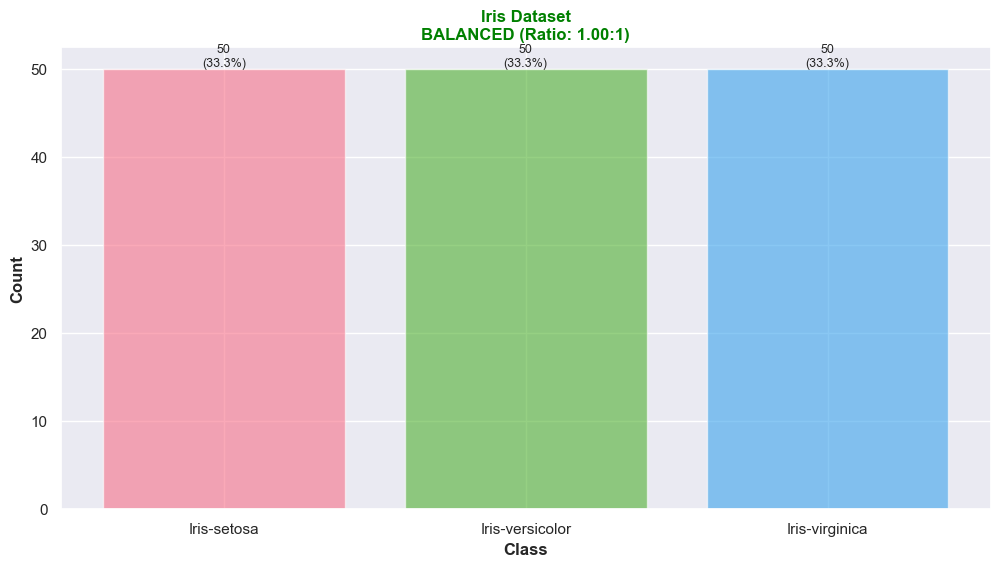

In [15]:
fig, ax = plt.subplots()

class_counts = iris_df['Species'].value_counts().sort_index()
colors = sns.color_palette('husl', len(class_counts))
bars = ax.bar(range(len(class_counts)), class_counts.values, color=colors, alpha=0.6)

pcts = (class_counts / iris_df.shape[0]) * 100

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{class_counts.values[i]}\n({pcts.values[i]:.1f}%)',
            ha='center', va='bottom', fontsize=9)

ax.set_xticks(range(len(class_counts)))
ax.set_xticklabels(class_counts.index, ha='center')
ax.set_ylabel('Count', fontsize=12, fontweight='bold')
ax.set_xlabel('Class', fontsize=12, fontweight='bold')

balance_status = 'BALANCED'
color_status = 'green'
ax.set_title(f"Iris Dataset\n{balance_status} (Ratio: 1.00:1)",fontsize=12, fontweight='bold', color=color_status)

As we can see with the plots as well, the problem is perfect balanced.

##### Box Plot

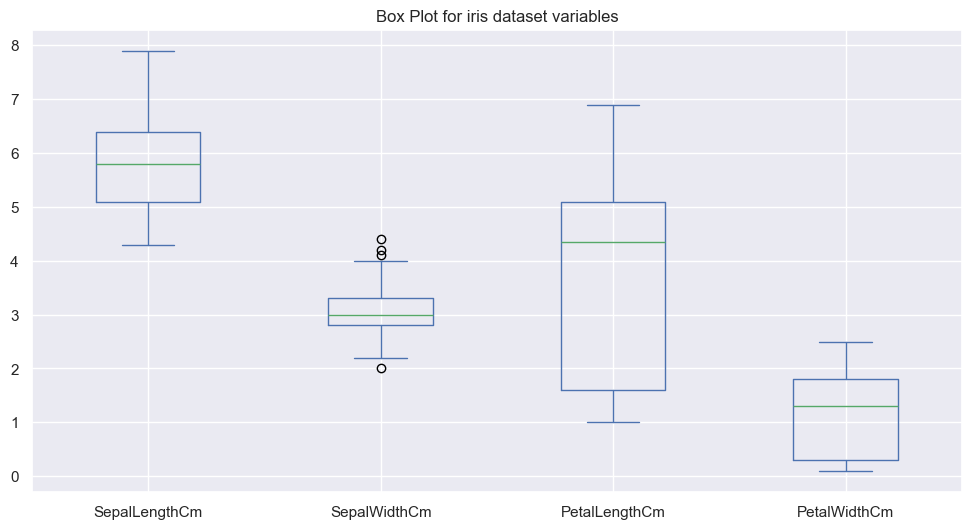

In [16]:
iris_df.plot.box()
plt.title('Box Plot for iris dataset variables')
plt.show()

As we can see, we can summarize above results in the following way:

*   **SepalLengthCm**: This variable does not contain outliers and it should form a symmetric gaussian distribution.
*   **SepalWdithCm**: It contains 4 outliers, but the shape of the distribution is also symmetrical.
*   **PetalLengthCm**: This variable does not contain outliers, but it is heavily skewed since the median line is far from the center.
*   **PetalWidthCm**: This variable will follow a relative similar behavior than **PetalLengthCm**. The difference is that this variable has less variance.



We can prove our assumptions from the box plot by plotting the distribution of the variables:

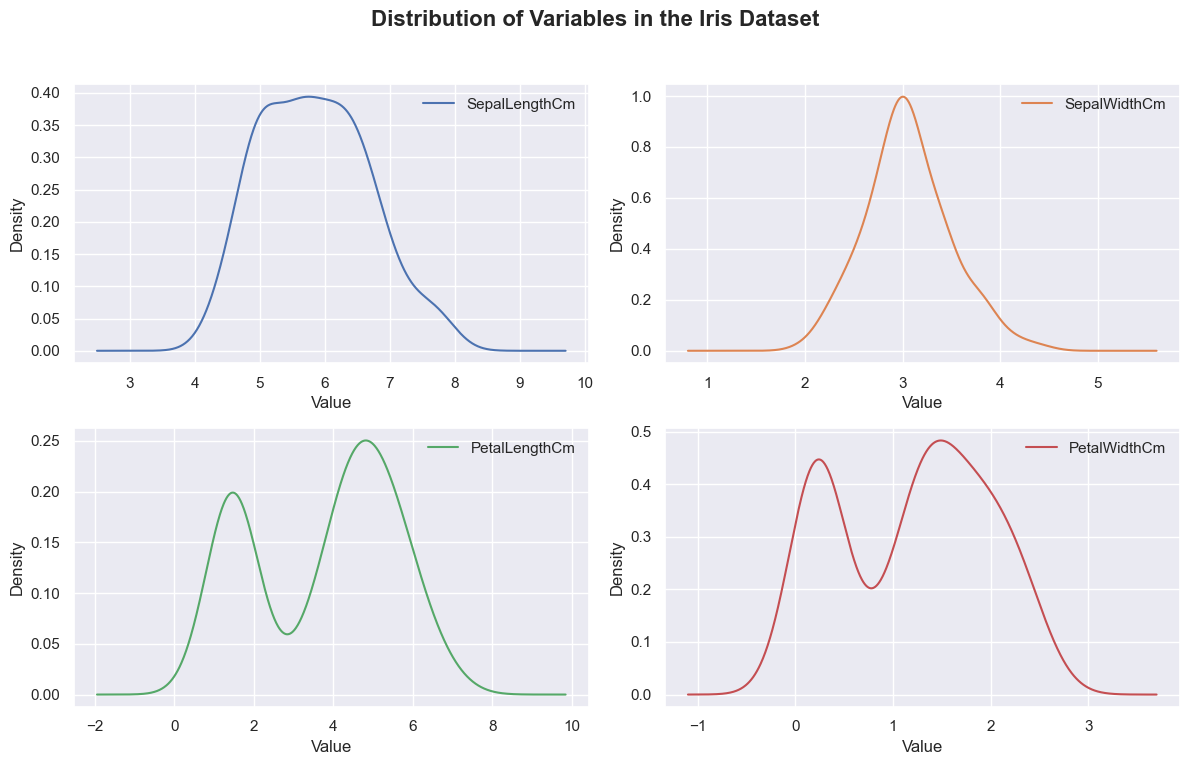

In [17]:
axes = iris_df.plot(kind='density', subplots=True, layout=(2, 2), figsize=(12, 8), sharex=False)

fig = plt.gcf()
fig.suptitle('Distribution of Variables in the Iris Dataset', fontsize=16, fontweight='bold')
for ax in axes.flatten():
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.set_title(ax.get_title(), fontsize=12, fontweight='semibold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The distributions reveal that petal length and petal width are highly informative features, as evidenced by their bimodal density curves. Sepal-related variables present more overlapping and approximately unimodal distributions, suggesting lower class separability

We can also plot all the data in pairs to see how each variable relates to each other and if there is pair of variables that can give more information:

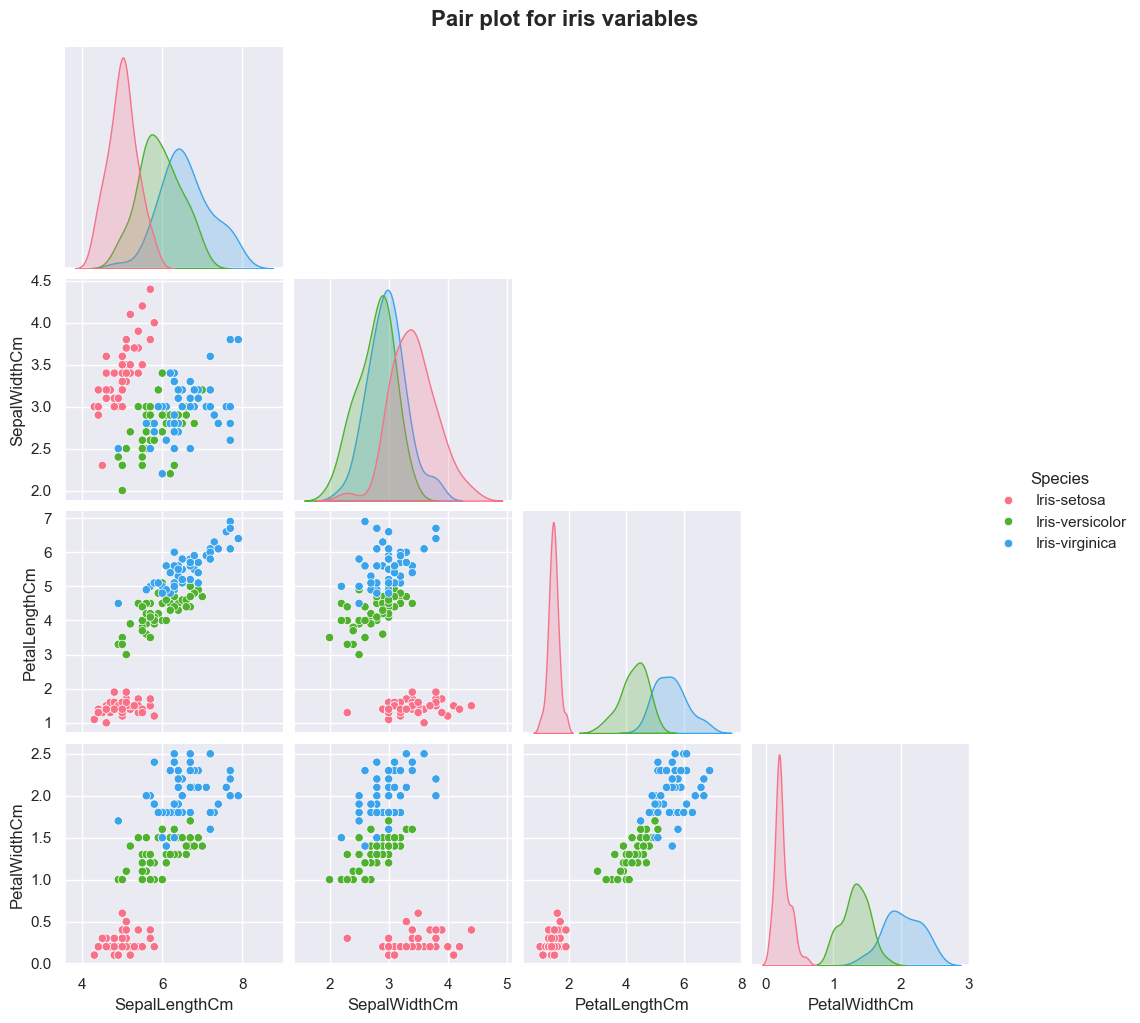

In [18]:
g = sns.pairplot(iris_df, hue='Species', palette='husl', corner=True)
g.fig.suptitle('Pair plot for iris variables', fontsize=16, fontweight='bold', y=1.02)

plt.show()

As we can see there are a couple of variables that can separate the data pretty well. For example **PetalWidthCm** and **PetalLengthCm**. However, if we'd use just two variables, there are still some observations that can be tricky, specially some of Iris-versicolor and Iris-virginica, so we would have to add more variables.

Now, we will see the correlation between the different variables in the iris dataset

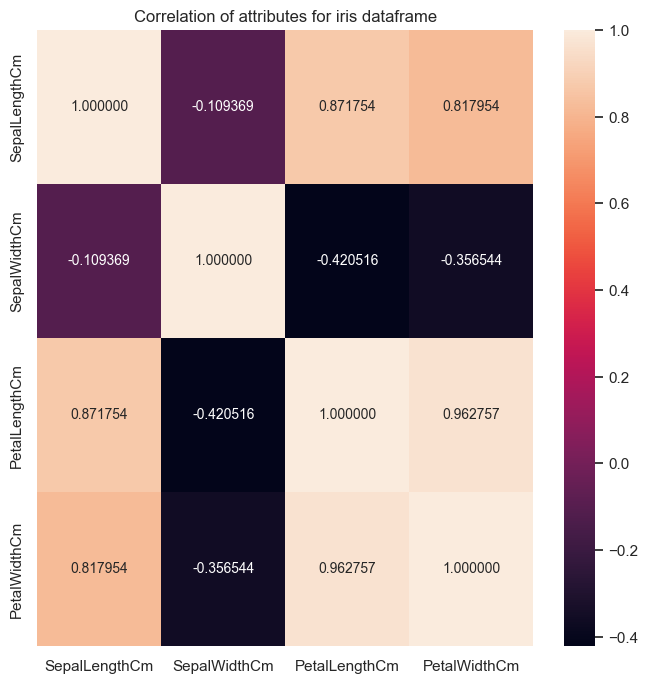

In [19]:
plt.subplots(figsize=(8, 8))
sns.heatmap(iris_df.iloc[:,0:4].corr(), annot=True, fmt='f').set_title('Correlation of attributes for iris dataframe')
plt.show()

As we can see, there are some variables higly correlated that we could drop since they don't give more information for our model. However, since the number of variable is quite small, we will train our models using all the variables.

### 3.2 Mushroom Dataset

#### 3.2.1 Basic Analysis

We read the mushroom dataset

In [20]:
mush_path = '../data/mushrooms.csv'
mush_df = pd.read_csv(mush_path)
mush_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Now, we will see the different classes we have to classify:

In [21]:
mush_df['class'].unique()

<StringArray>
['p', 'e']
Length: 2, dtype: str

This dataset has two different classes to predict

Let's see the shape of the data:

In [22]:
mush_df.shape

(8124, 23)

We have *8124* observations and 23 variables. Now, let's see which type is each variable:

In [23]:
mush_df.dtypes

class                       str
cap-shape                   str
cap-surface                 str
cap-color                   str
bruises                     str
odor                        str
gill-attachment             str
gill-spacing                str
gill-size                   str
gill-color                  str
stalk-shape                 str
stalk-root                  str
stalk-surface-above-ring    str
stalk-surface-below-ring    str
stalk-color-above-ring      str
stalk-color-below-ring      str
veil-type                   str
veil-color                  str
ring-number                 str
ring-type                   str
spore-print-color           str
population                  str
habitat                     str
dtype: object

As we can see, all the variables are object, meaning that either they are strings or we have nan values in some of the columns. For finding out which is true, we will count the number of nan values:

In [24]:
mush_df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

As we can see there aren't nan values. This means that all the variables are strings.



Let's see how balance is the data:

In [25]:
mush_df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

As we can see the data is well balanced.

#### 3.2.2 Plots

##### Class Distribution Plot

First, we will plot the class distribution to see how balanced is the data.

Text(0.5, 1.0, 'Mushroom Dataset\nBALANCED (Ratio: 1.07:1)')

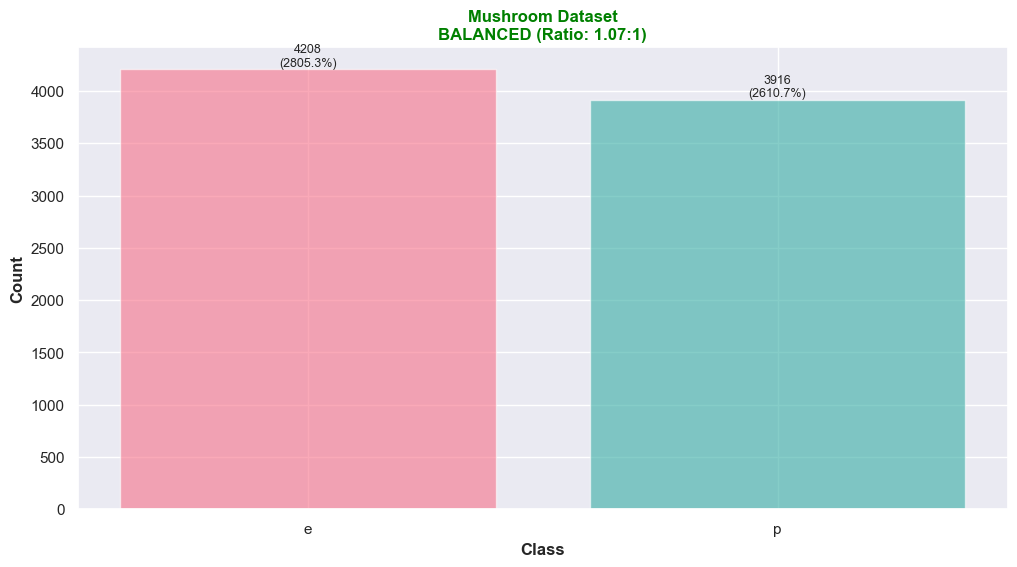

In [26]:
fig, ax = plt.subplots()

class_counts = mush_df['class'].value_counts().sort_index()
colors = sns.color_palette('husl', len(class_counts))
bars = ax.bar(range(len(class_counts)), class_counts.values, color=colors, alpha=0.6)

pcts = (class_counts / iris_df.shape[0]) * 100

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{class_counts.values[i]}\n({pcts.values[i]:.1f}%)',
            ha='center', va='bottom', fontsize=9)

ax.set_xticks(range(len(class_counts)))
ax.set_xticklabels(class_counts.index, ha='center')
ax.set_ylabel('Count', fontsize=12, fontweight='bold')
ax.set_xlabel('Class', fontsize=12, fontweight='bold')

balance_status = 'BALANCED'
color_status = 'green'
ax.set_title(f"Mushroom Dataset\n{balance_status} (Ratio: 1.07:1)",fontsize=12, fontweight='bold', color=color_status)

As we can see with the plot as well, the problem is pretty balanced.

Since most of the variables are categorical for this dataset, we will make the following plots:

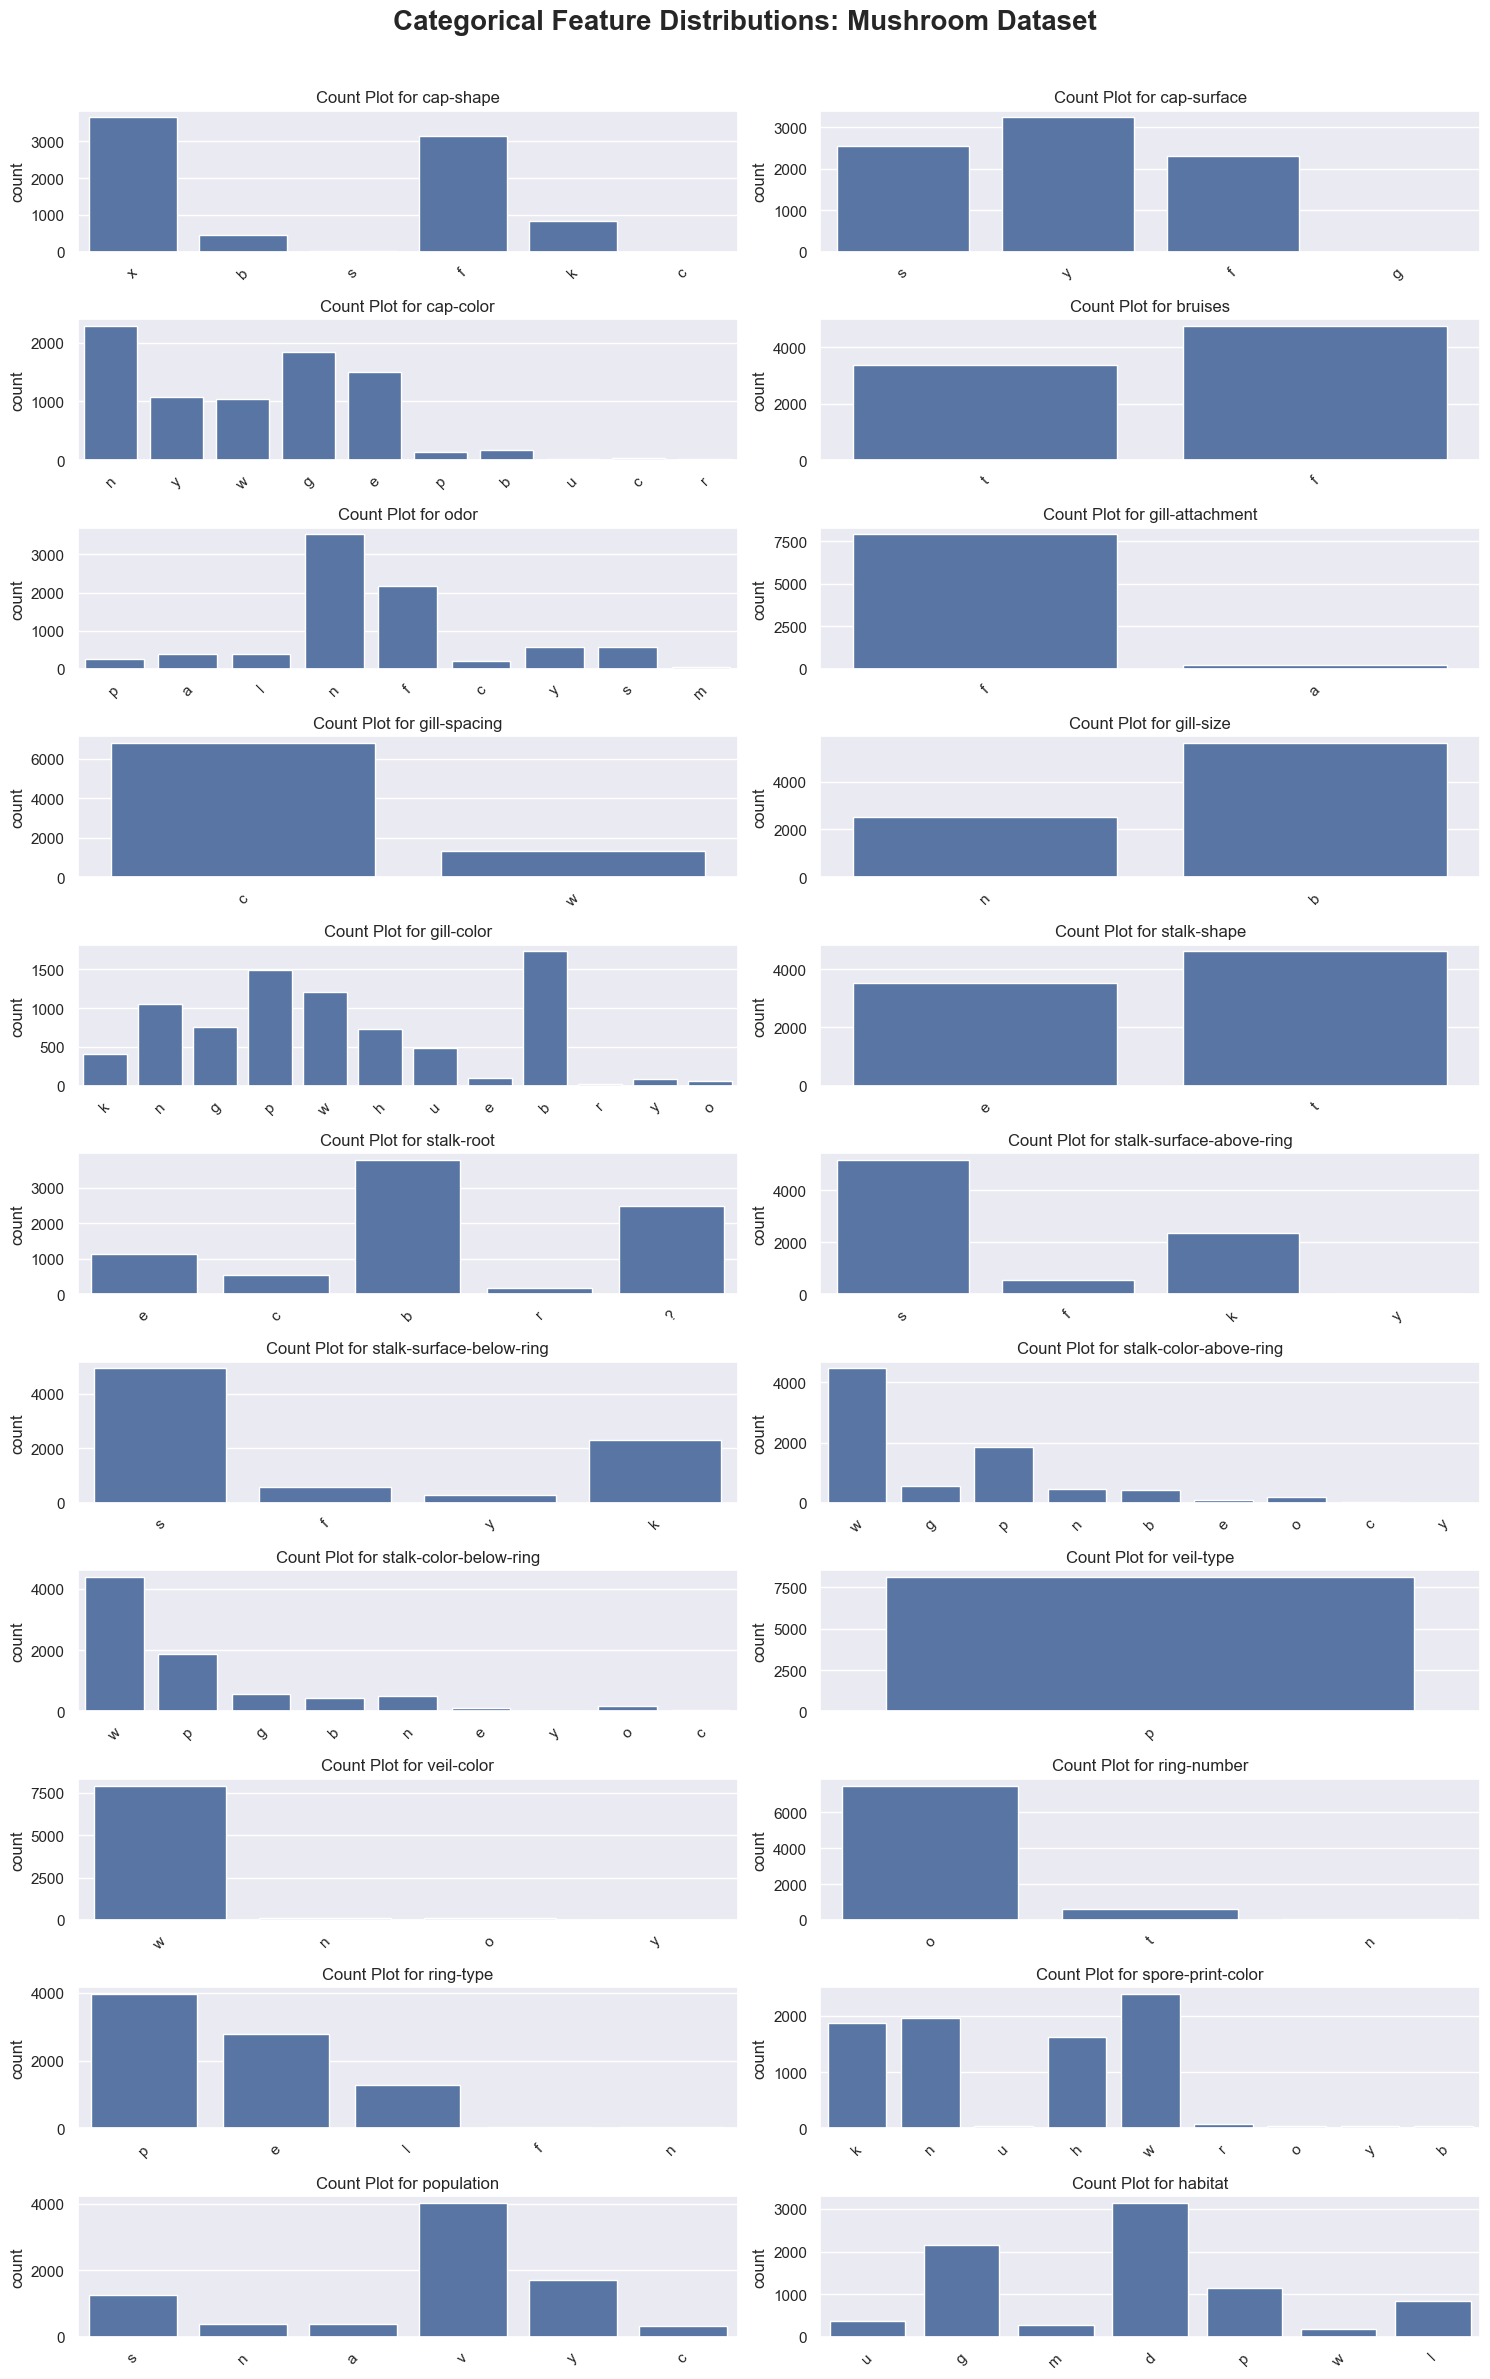

In [27]:
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(15, 25))

fig.suptitle('Categorical Feature Distributions: Mushroom Dataset', fontsize=20, fontweight='bold', y=0.98)

for i, feature in enumerate(mush_df.columns.to_list()[1:]):
  row = i//2
  col = i%2
  sns.countplot(data=mush_df, x=feature, ax=axes[row, col])
  axes[row, col].set_title(f'Count Plot for {feature}')
  axes[row, col].tick_params(axis='x', rotation=45)
  axes[row, col].set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

As we can see, there is a lot of variation in the frequencies of the different variables with some variables having almost all their samples in the same category.

Cramér’s V highlights which categorical variables have the strongest association.

**Ref:** Agresti, A. (2013). Categorical data analysis. John Wiley & Sons.

In [28]:

# defs for cramers v estimation and heatmap
def cramers_v(x, y):
    # convert to numpy arrays 
    x = pd.Series(x).astype(str).to_numpy()
    y = pd.Series(y).astype(str).to_numpy()

    # factorize categories
    x_codes, x_uniques = pd.factorize(x, sort=True)
    y_codes, y_uniques = pd.factorize(y, sort=True)

    # build contingency table
    ct = np.zeros((len(x_uniques), len(y_uniques)), dtype=np.int64)
    np.add.at(ct, (x_codes, y_codes), 1)

    # chi-square test
    chi2 = chi2_contingency(ct)[0]
    n = ct.sum()
    r, k = ct.shape
    denom = n * (min(r, k) - 1)

    return 0.0 if denom == 0 else np.sqrt(chi2 / denom)

def cramers_v_heatmap(df):
    # Only categorical features
    cat_cols = df.columns

    # Compute Cramér's V matrix
    cramers_matrix = pd.DataFrame(
        np.zeros((len(cat_cols), len(cat_cols))),
        index=cat_cols,
        columns=cat_cols
    )

    for i, col1 in enumerate(cat_cols):
        for j, col2 in enumerate(cat_cols):
            if i <= j:
                v = cramers_v(df[col1], df[col2])
                cramers_matrix.loc[col1, col2] = v
                cramers_matrix.loc[col2, col1] = v

    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cramers_matrix,
        cmap="viridis",
        vmin=0, vmax=1,
        square=True,
        cbar_kws={"label": "Cramér's V"}
    )
    plt.title("Cramér's V Heatmap for Categorical Variables", fontsize=14)
    plt.tight_layout()
    plt.show()

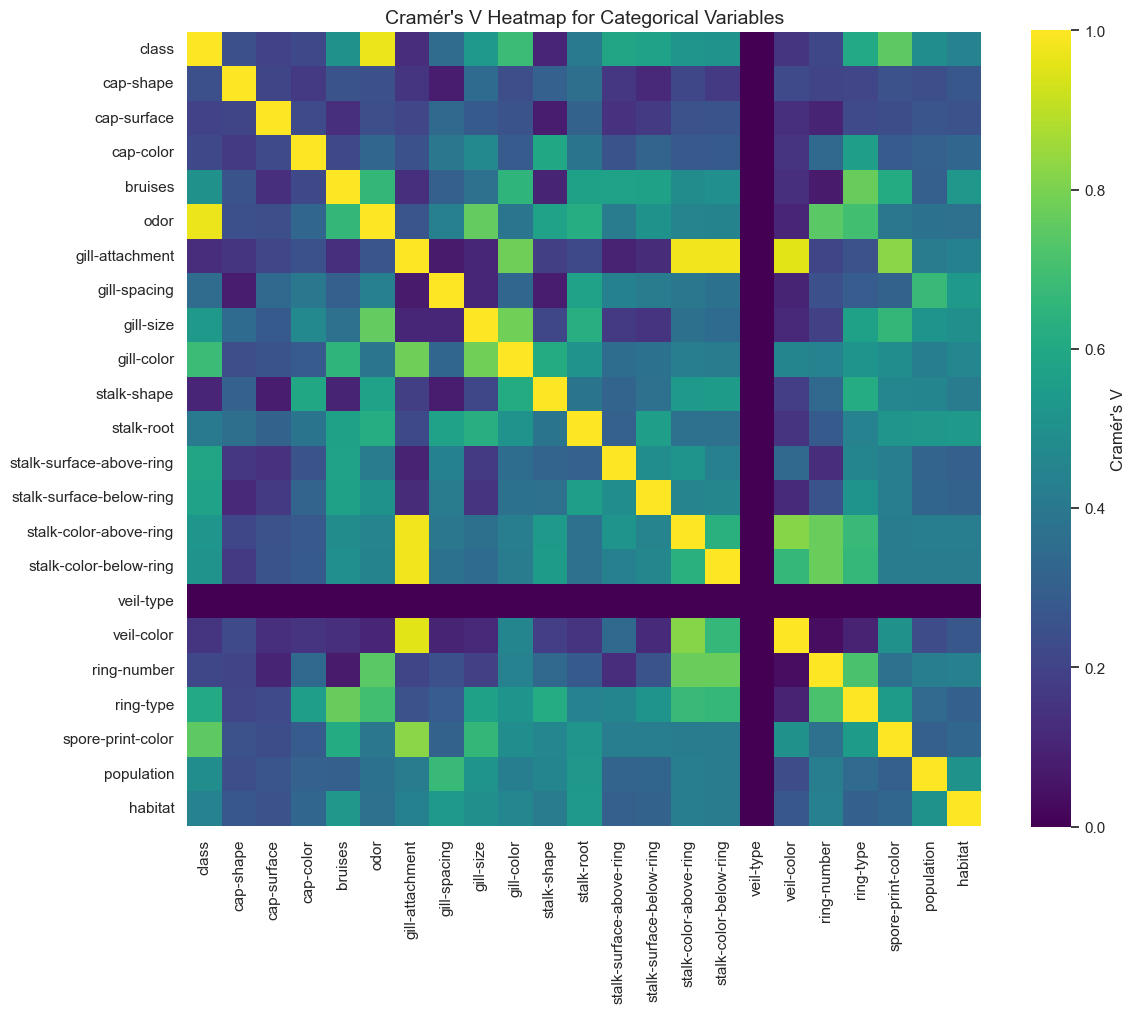

In [29]:
cramers_v_heatmap(mush_df)

### 3.3 Bank Churners

#### 3.3.1 Basic Analysis

We read the bank churners dataset

In [30]:
bank_churners_path = '../data/BankChurners.csv'
bank_churners_df = pd.read_csv(bank_churners_path)
bank_churners_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Check the shape of the dataset:

In [31]:
bank_churners_df.shape

(10127, 21)

Now, let's see the types of each column:

In [32]:
bank_churners_df.dtypes

CLIENTNUM                     int64
Attrition_Flag                  str
Customer_Age                  int64
Gender                          str
Dependent_count               int64
Education_Level                 str
Marital_Status                  str
Income_Category                 str
Card_Category                   str
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

Let's see the unique values of Attrition_Flag, that is our target variable.

In [33]:
bank_churners_df['Attrition_Flag'].unique()

<StringArray>
['Existing Customer', 'Attrited Customer']
Length: 2, dtype: str

Let's describe the dataset to see some information regarding the numerical variables in the dataset:

In [34]:
bank_churners_df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


As we can see, there is a big gap between some numerical variables. For example, the variable dependen_count has a mean of 2.34 with a standard deviation of 1.29 while the variable avg_open_to_buy has a mean of 7469 and a standard deviation of 9090. This means that it will be good to standarize the data before training the models. We will do that in the step for modeling.

Let's see the nan values in the dataset

In [35]:
bank_churners_df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

There isn't nan values.

Let's see the imbalance of the data

In [36]:
bank_churners_df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

As we can see this dataset is imbalanced. There is a factor of approximately 5:1 between the existing customers and the attrited customers. Since this is an imbalanced dataset, we will have to manage it specifically in the following stage (modeling)

#### 3.3.2 Plots

##### Class distribution Plot

First, we will see how well balanced is the problem.

Text(0.5, 1.0, 'Bank Churners Dataset\nIMBALANCED (Ratio: 5.22:1)')

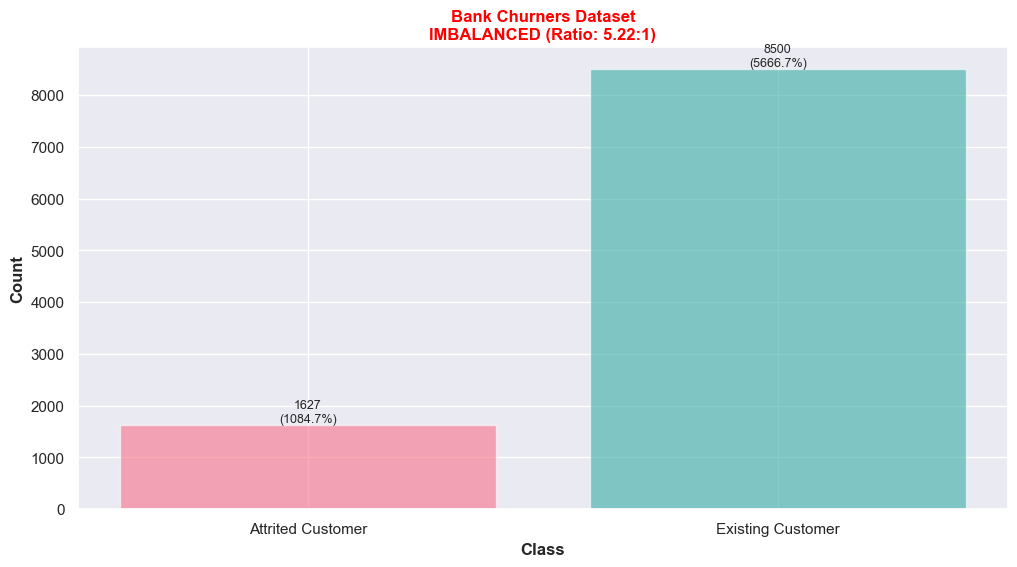

In [37]:
fig, ax = plt.subplots()

class_counts = bank_churners_df['Attrition_Flag'].value_counts().sort_index()
colors = sns.color_palette('husl', len(class_counts))
bars = ax.bar(range(len(class_counts)), class_counts.values, color=colors, alpha=0.6)

pcts = (class_counts / iris_df.shape[0]) * 100

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{class_counts.values[i]}\n({pcts.values[i]:.1f}%)',
            ha='center', va='bottom', fontsize=9)

ax.set_xticks(range(len(class_counts)))
ax.set_xticklabels(class_counts.index, ha='center')
ax.set_ylabel('Count', fontsize=12, fontweight='bold')
ax.set_xlabel('Class', fontsize=12, fontweight='bold')

balance_status = 'IMBALANCED'
color_status = 'red'
ax.set_title(f"Bank Churners Dataset\n{balance_status} (Ratio: 5.22:1)",fontsize=12, fontweight='bold', color=color_status)

As we can see with the plot, the problem is moderate imbalanced.

Since we have categorical variables and numerical variables, first we will divide them to plot specific types of graphs for each type of data.

In [38]:
categorical_cols = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category',
]

numerical_cols = [
    'Customer_Age',
    'Dependent_count',
    'Months_on_book',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Credit_Limit',
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio'
]

In [39]:
bank_churners_categorical = bank_churners_df[categorical_cols].copy()
bank_churners_numerical = bank_churners_df[numerical_cols].copy()

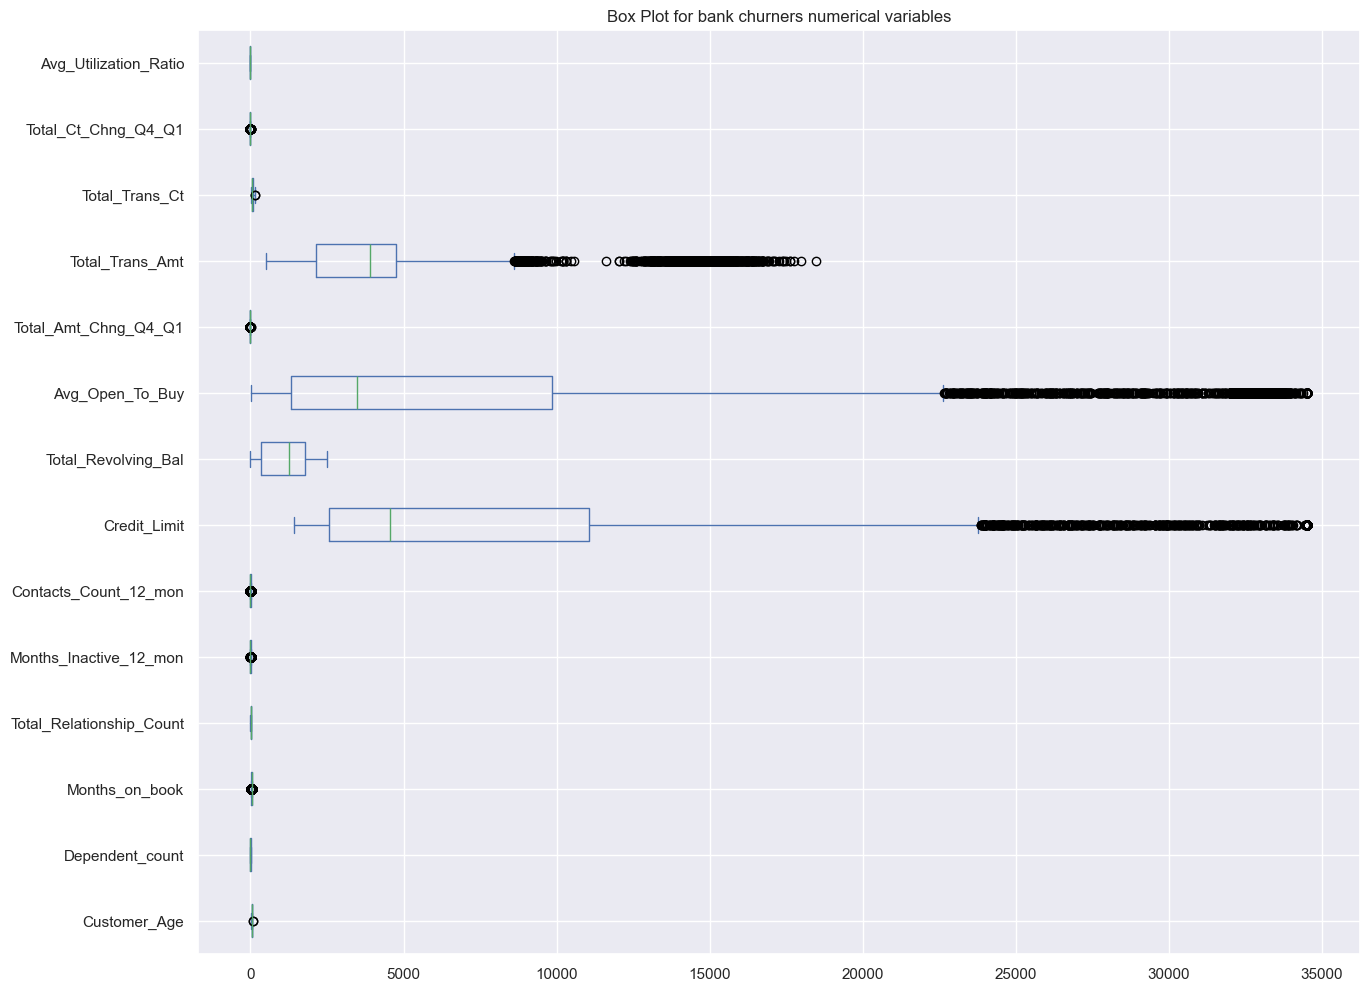

In [40]:
bank_churners_numerical.plot.box(figsize=(15, 12), vert=False)
plt.title('Box Plot for bank churners numerical variables')
plt.show()

As we suspected, the difference between the scales of the variables make them look like some values are pretty small and other are pretty big. Let's standarize to see how the outliers look.

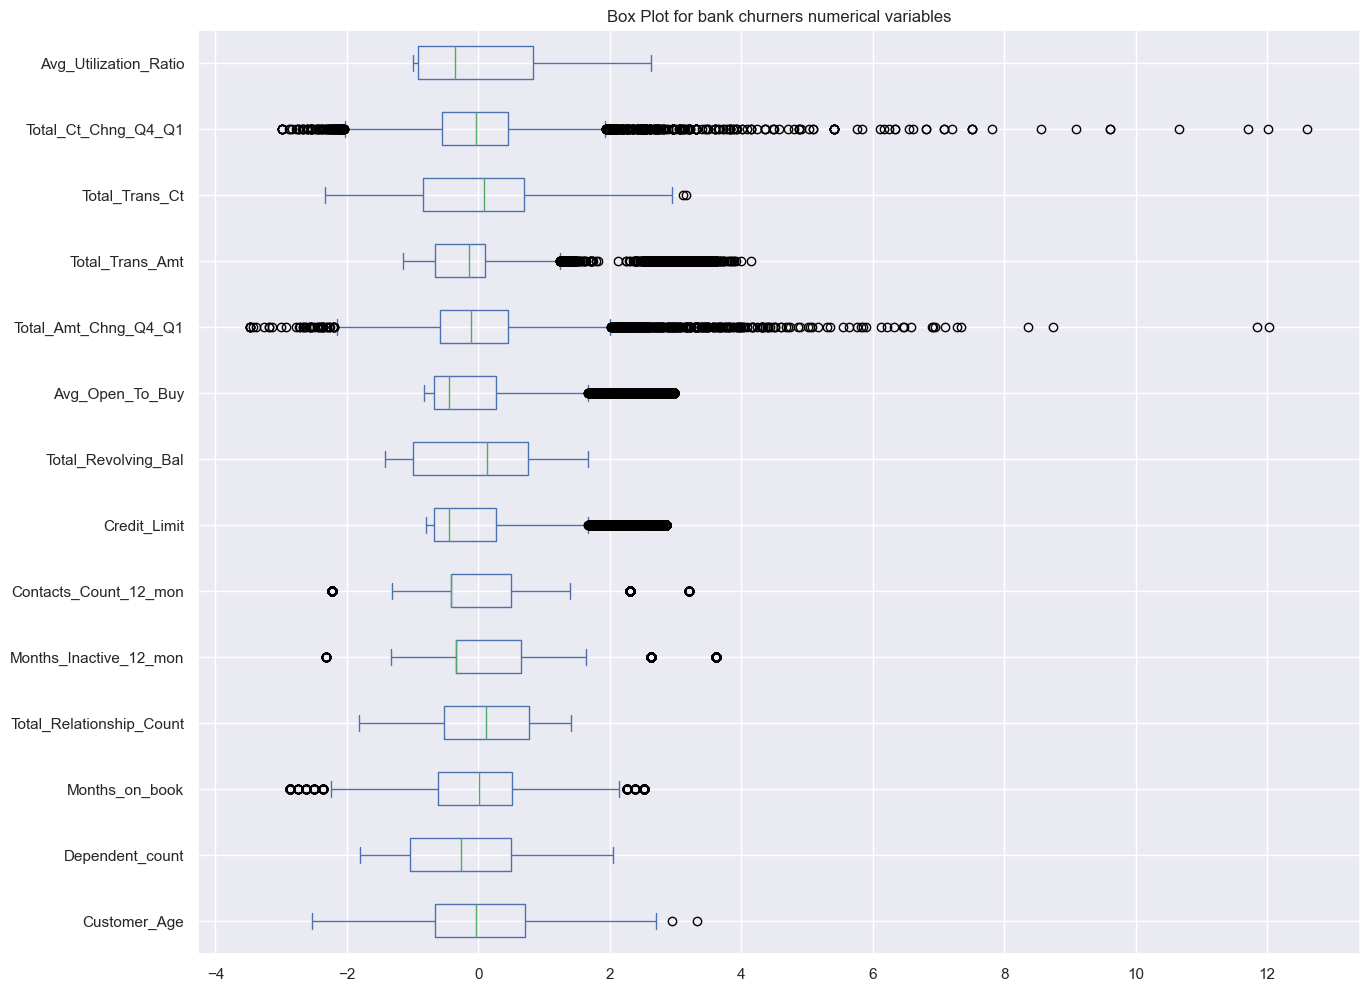

In [41]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(bank_churners_numerical)
df_scaled = pd.DataFrame(scaled_data, columns=bank_churners_numerical.columns)
df_scaled.plot.box(figsize=(15, 12), vert=False)
plt.title('Box Plot for bank churners numerical variables')
plt.show()

After standarizing, there are still many outliers in the data. Let's analyze a little bit these outliers to decide whether we will include them in the final model or not.

As we can see, Total_Ct_Chng_Q4_Q1 and Total_Amt_Chng_Q4_Q1 are the ones with most outliers. For these variables, it could mean that most customers have a stable behavior, but there is a group that shows weird transaction behaviors. This behavior can be a sign of a churner and thus, we will let the outliers.

The other columns with a moderate number of outliers are credit_limit and avg_open_to_buy that can also make sense since there could be premium customers with really high credit limit, so we wil also keep the outliers.

The other variables that maintain outliers can also indicate that a customer might churn or not, so we will keep the outliers as well.

Now, we will see the correlation between each of the variables:

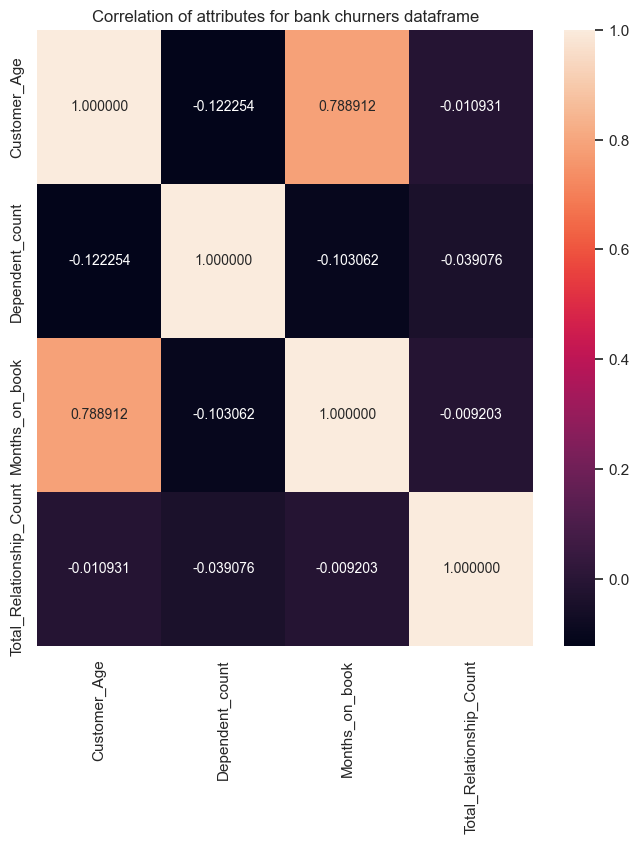

In [42]:
plt.subplots(figsize=(8, 8))
sns.heatmap(bank_churners_numerical.iloc[:,0:4].corr(), annot=True, fmt='f').set_title('Correlation of attributes for bank churners dataframe')
plt.show()

The only highly correlated variable is customer_age with months_on_book. We will leave it as it is in the analysis.

Let's analyze now the categorical variables. We will see their frequency along with their correlation:

In [43]:
bank_churners_categorical

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,Unknown,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...
10122,M,Graduate,Single,$40K - $60K,Blue
10123,M,Unknown,Divorced,$40K - $60K,Blue
10124,F,High School,Married,Less than $40K,Blue
10125,M,Graduate,Unknown,$40K - $60K,Blue


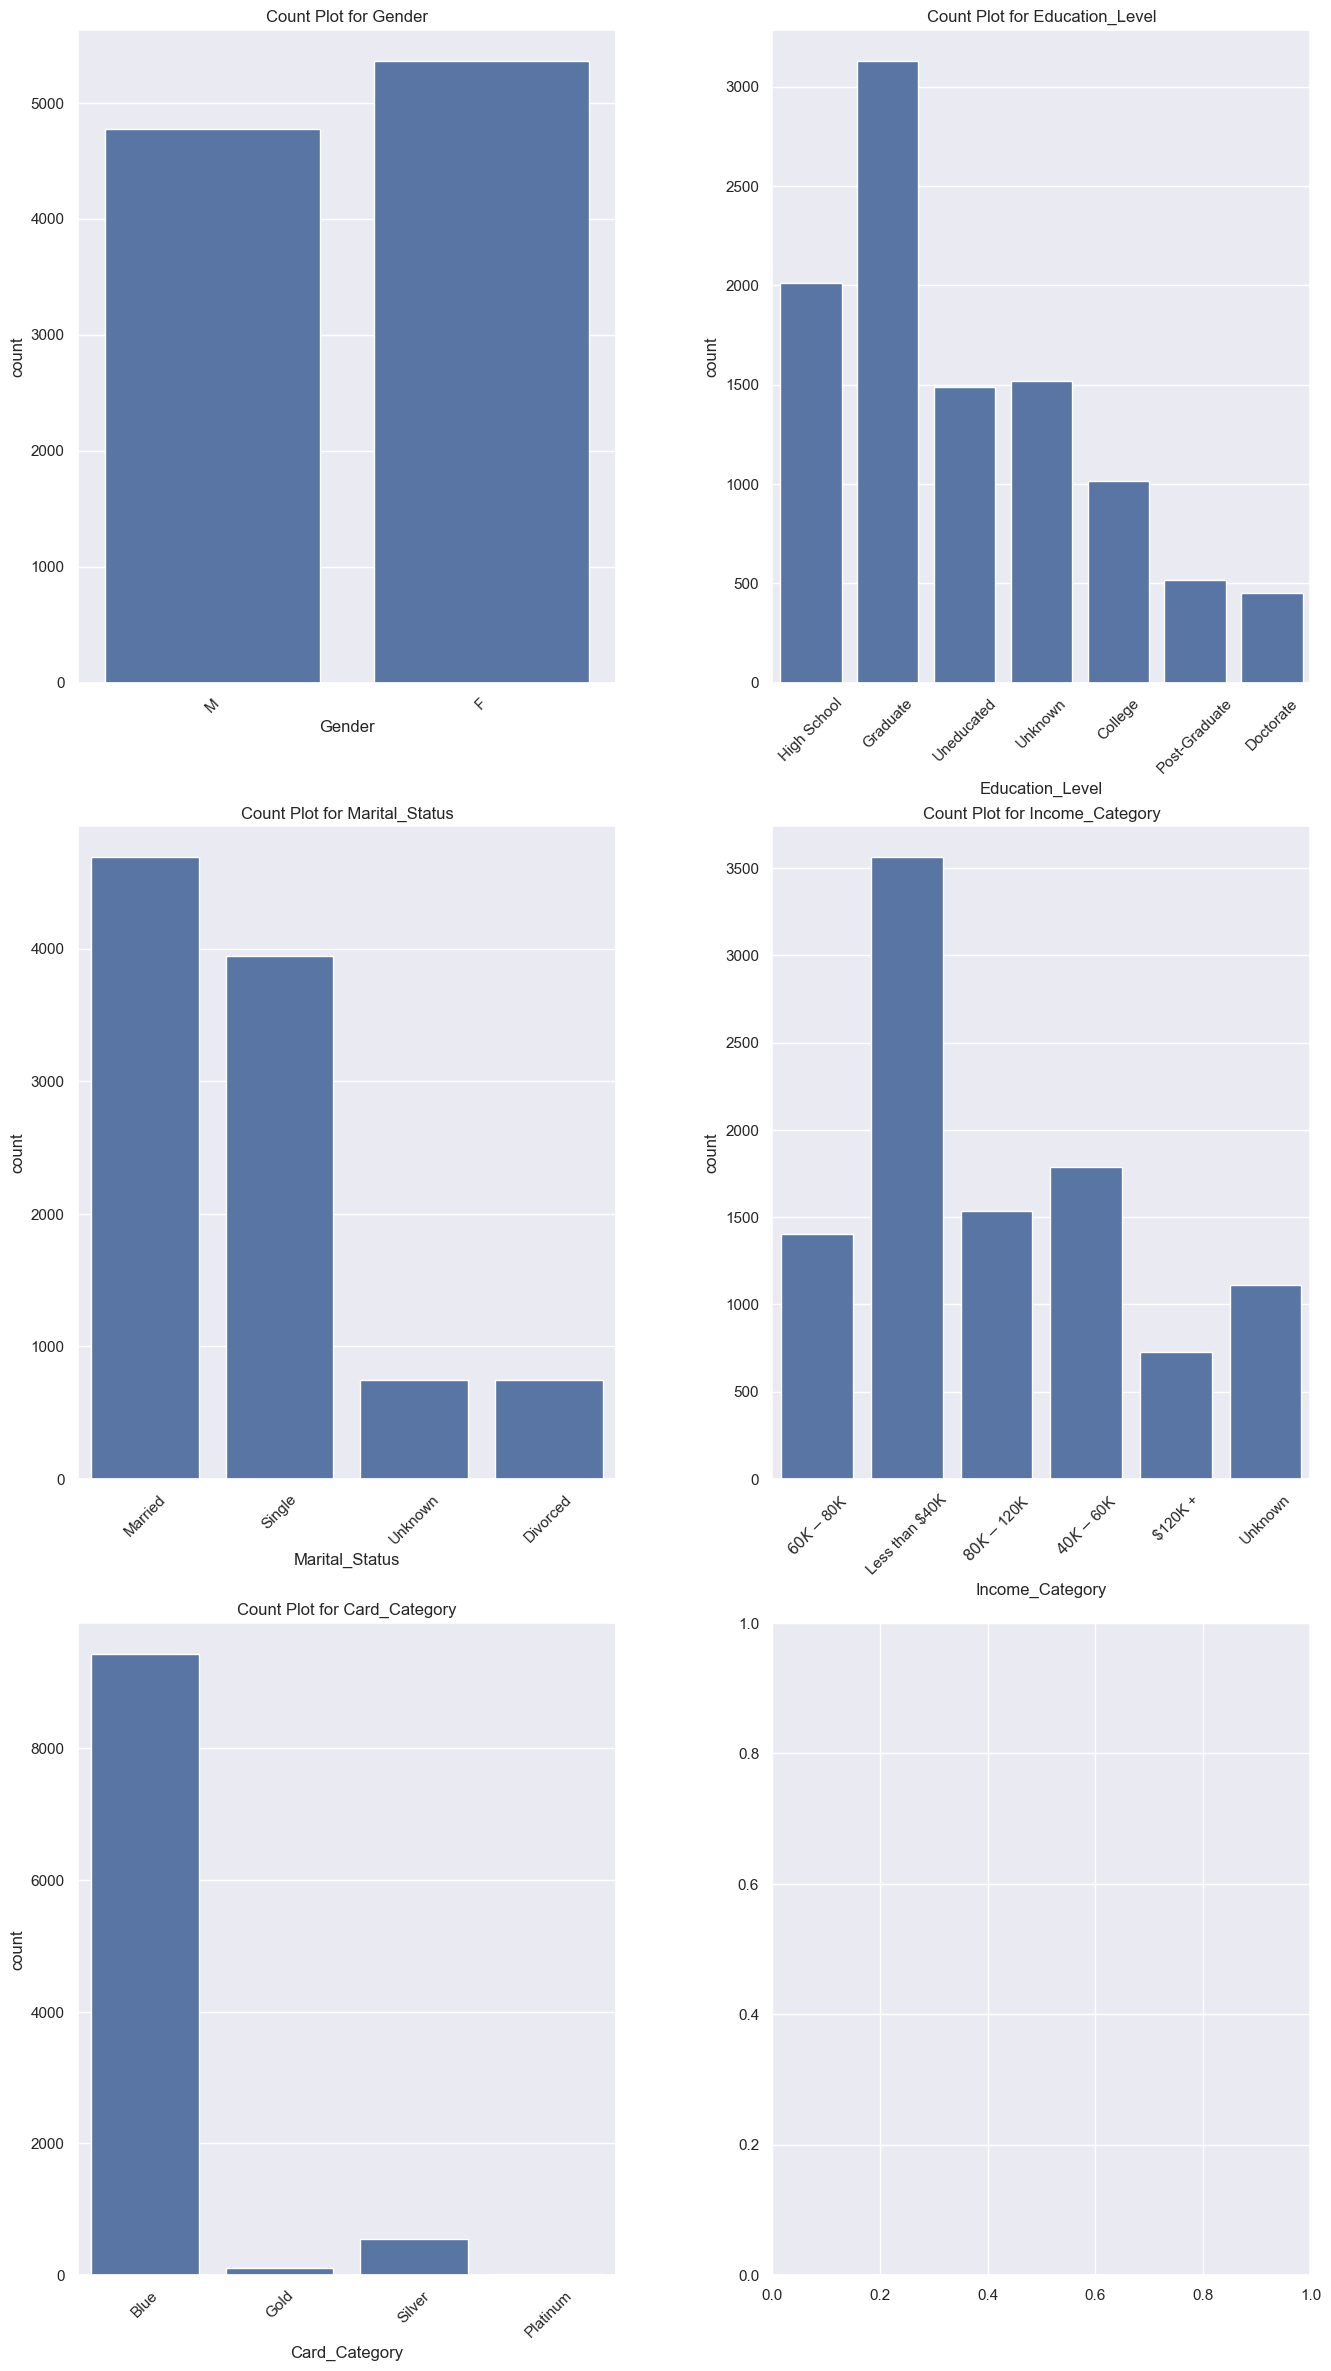

In [44]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 25))
plt.tight_layout(pad = 8.0)

for i, feature in enumerate(bank_churners_categorical.columns.to_list()):
  row = i//2
  col = i%2
  sns.countplot(data=bank_churners_categorical, x=feature, ax=axes[row, col])
  axes[row, col].set_title(f'Count Plot for {feature}')
  axes[row, col].tick_params(axis='x', rotation=45)

plt.show()

As we can see, there are some variables that are more balanced in this case. For example gender or education level and there are other ones that are almost entirely dominated by one value like the case for card category. This makes sense since in a normal datasets, the vast majority of customers will have the standard card rather than a silver or platinum one.

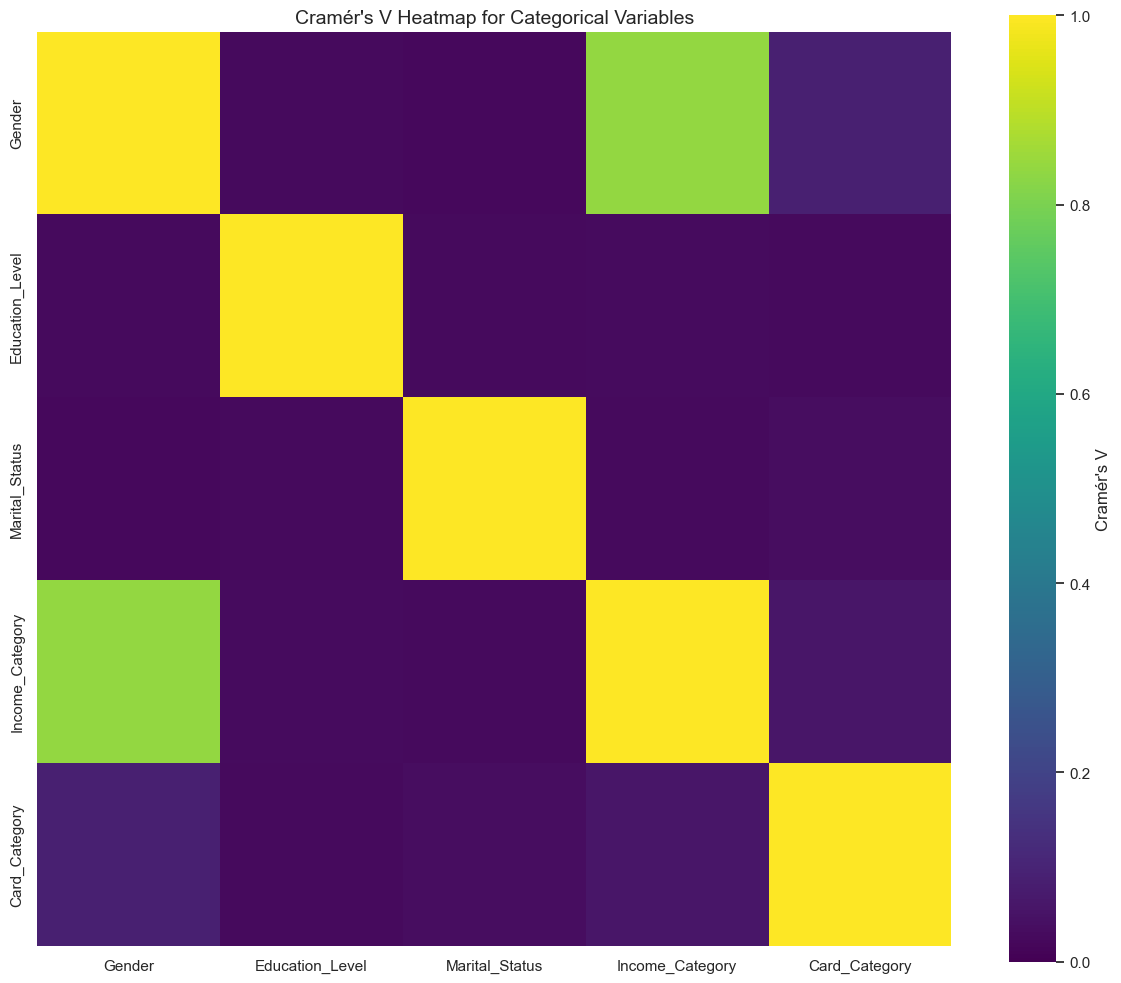

In [45]:
cramers_v_heatmap(bank_churners_categorical)

In this case the only variables that are more correlated are gender and income_category, but this might not be useful for our classification model.

### 3.4 Credit Risk

#### 3.4.1 Basic Analysis

We read the dataset for credit risk

In [46]:
credit_risk_path = '../data/synthetic_credit_risk.csv'
credit_risk_df = pd.read_csv(credit_risk_path)
credit_risk_df.head()

,age,monthly_income,debt_ratio,credit_utilization,transaction_count_30d,avg_transaction_amount,employment_type,education_level,region,device_type,last_payment_delay_days,internal_score_v2,target
0,43.6,67139.59,0.341,0.508,44,56.04,contract,master,rural,desktop,0.30,546.3,0
1,42.3,69322.76,0.318,0.427,43,71.57,contract,master,urban,desktop,2.16,583.2,0
2,29.4,31240.70,0.380,0.519,43,88.01,full_time,high_school,suburban,tablet,1.14,544.0,0
3,52.5,23838.70,0.372,0.481,50,69.37,full_time,bachelor,urban,tablet,4.56,569.4,0
4,44.0,36584.21,0.129,0.213,44,93.56,contract,bachelor,urban,mobile,1.78,669.9,0


We now check the shape of the data

In [47]:
credit_risk_df.shape

(15000, 13)

And see the column types

In [48]:
credit_risk_df.dtypes

age                        float64
monthly_income             float64
debt_ratio                 float64
credit_utilization         float64
transaction_count_30d        int64
avg_transaction_amount     float64
employment_type                str
education_level                str
region                         str
device_type                    str
last_payment_delay_days    float64
internal_score_v2          float64
target                       int64
dtype: object

Now, let's see some information of the dataframe

In [49]:
credit_risk_df.describe()

,age,monthly_income,debt_ratio,credit_utilization,transaction_count_30d,avg_transaction_amount,last_payment_delay_days,internal_score_v2,target
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,45.557853,43234.147455,0.334668,0.400615,43.333800,92.102736,2.586447,587.514093,0.077200
std,11.014118,21169.380032,0.154811,0.196154,8.584231,35.616869,3.416169,57.425613,0.266917
min,18.000000,4024.160000,0.000000,0.000000,18.000000,10.000000,0.000000,276.500000,0.000000
25%,38.200000,28488.085000,0.229000,0.265000,38.000000,67.320000,0.650000,557.700000,0.000000
50%,45.600000,39141.395000,0.328000,0.392000,42.000000,91.655000,1.620000,592.600000,0.000000
75%,52.900000,53188.735000,0.431000,0.521000,47.000000,115.682500,3.260000,624.825000,0.000000
max,75.000000,205203.980000,1.000000,1.000000,95.000000,239.500000,50.430000,750.200000,1.000000


And see how imbalanced is the dataset:

In [50]:
credit_risk_df['target'].value_counts()

target
0    13842
1     1158
Name: count, dtype: int64

As we can see the dataset is heavily imbalanced

#### 3.4.2 Plots

##### Class distribution Plot

First, we will see how balance the problem is.

Text(0.5, 1.0, 'Credit Risk Dataset\nIMBALANCED (Ratio: 11.95:1)')

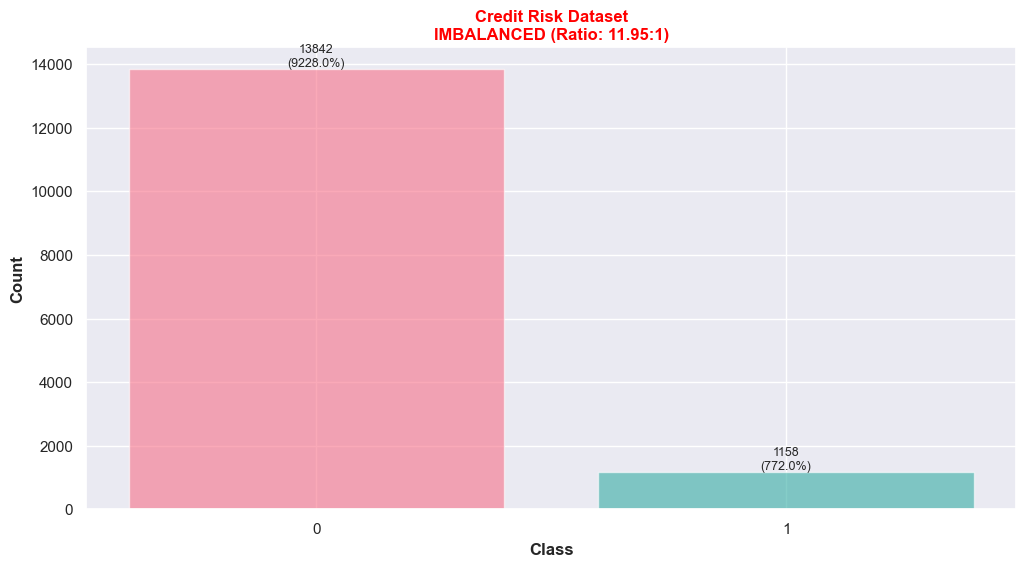

In [51]:
fig, ax = plt.subplots()

class_counts = credit_risk_df['target'].value_counts().sort_index()
colors = sns.color_palette('husl', len(class_counts))
bars = ax.bar(range(len(class_counts)), class_counts.values, color=colors, alpha=0.6)

pcts = (class_counts / iris_df.shape[0]) * 100

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{class_counts.values[i]}\n({pcts.values[i]:.1f}%)',
            ha='center', va='bottom', fontsize=9)

ax.set_xticks(range(len(class_counts)))
ax.set_xticklabels(class_counts.index, ha='center')
ax.set_ylabel('Count', fontsize=12, fontweight='bold')
ax.set_xlabel('Class', fontsize=12, fontweight='bold')

balance_status = 'IMBALANCED'
color_status = 'red'
ax.set_title(f"Credit Risk Dataset\n{balance_status} (Ratio: 11.95:1)",fontsize=12, fontweight='bold', color=color_status)

As we can see, the problem is really imbalanced.

To visualze the data for this dataset, we will also divide between categorical and numerical variables and we will plot them separately:

In [52]:
categorical_cols = [
    'employment_type',
    'education_level',
    'region',
    'device_type'
]

numerical_cols = [
    'age',
    'monthly_income',
    'debt_ratio',
    'credit_utilization',
    'transaction_count_30d',
    'avg_transaction_amount',
    'last_payment_delay_days',
    'internal_score_v2'
]

In [53]:
credit_risk_categorical = credit_risk_df[categorical_cols].copy()
credit_risk_numerical = credit_risk_df[numerical_cols].copy()

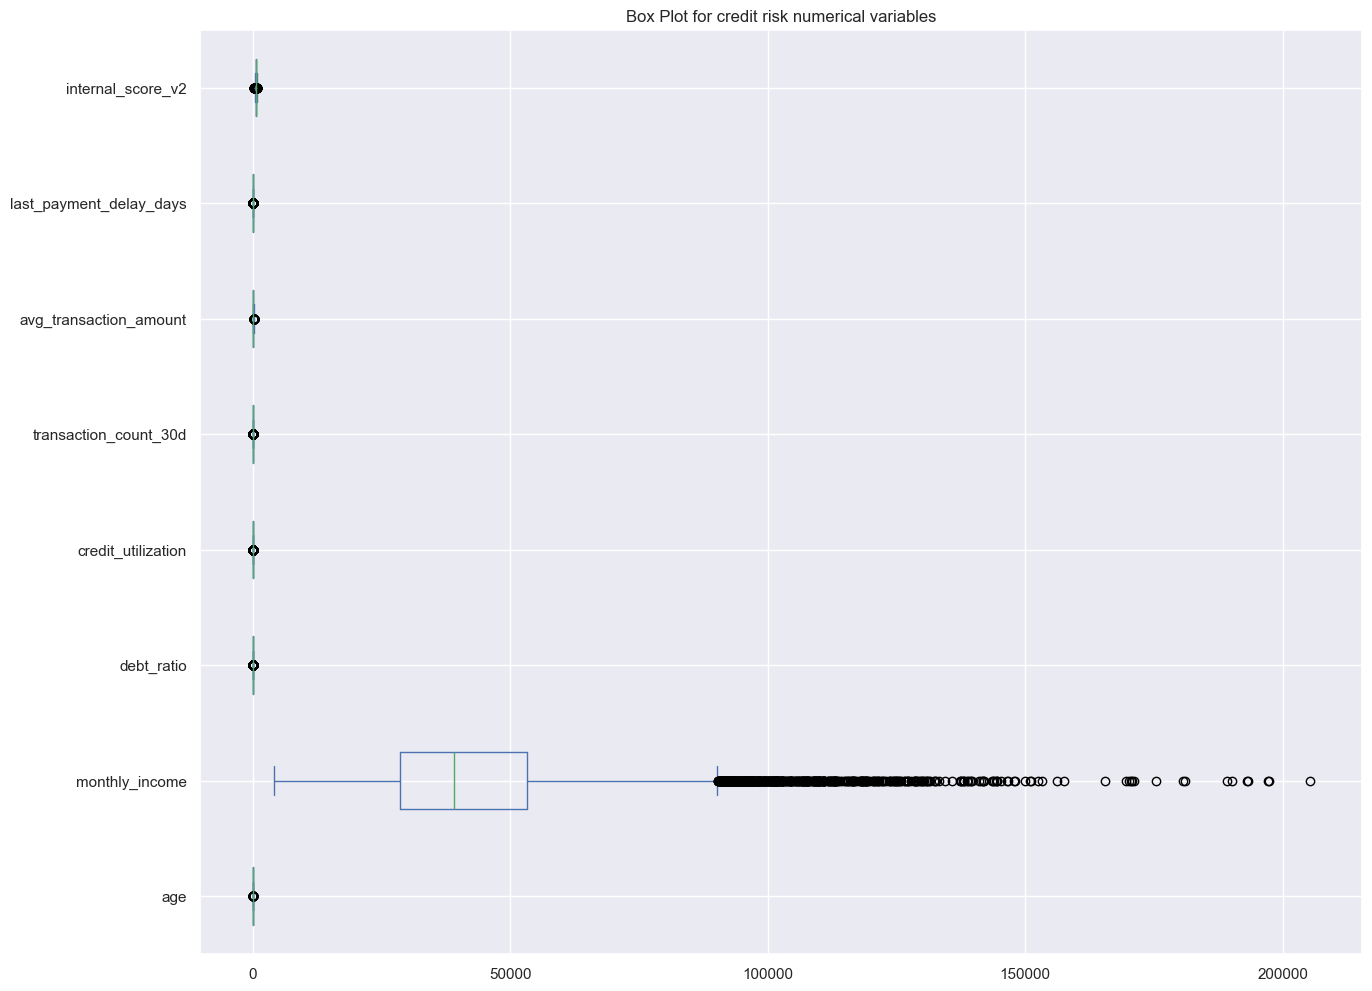

In [54]:
credit_risk_numerical.plot.box(figsize=(15, 12), vert=False)
plt.title('Box Plot for credit risk numerical variables')
plt.show()

We will standarize to see the values in a better way:

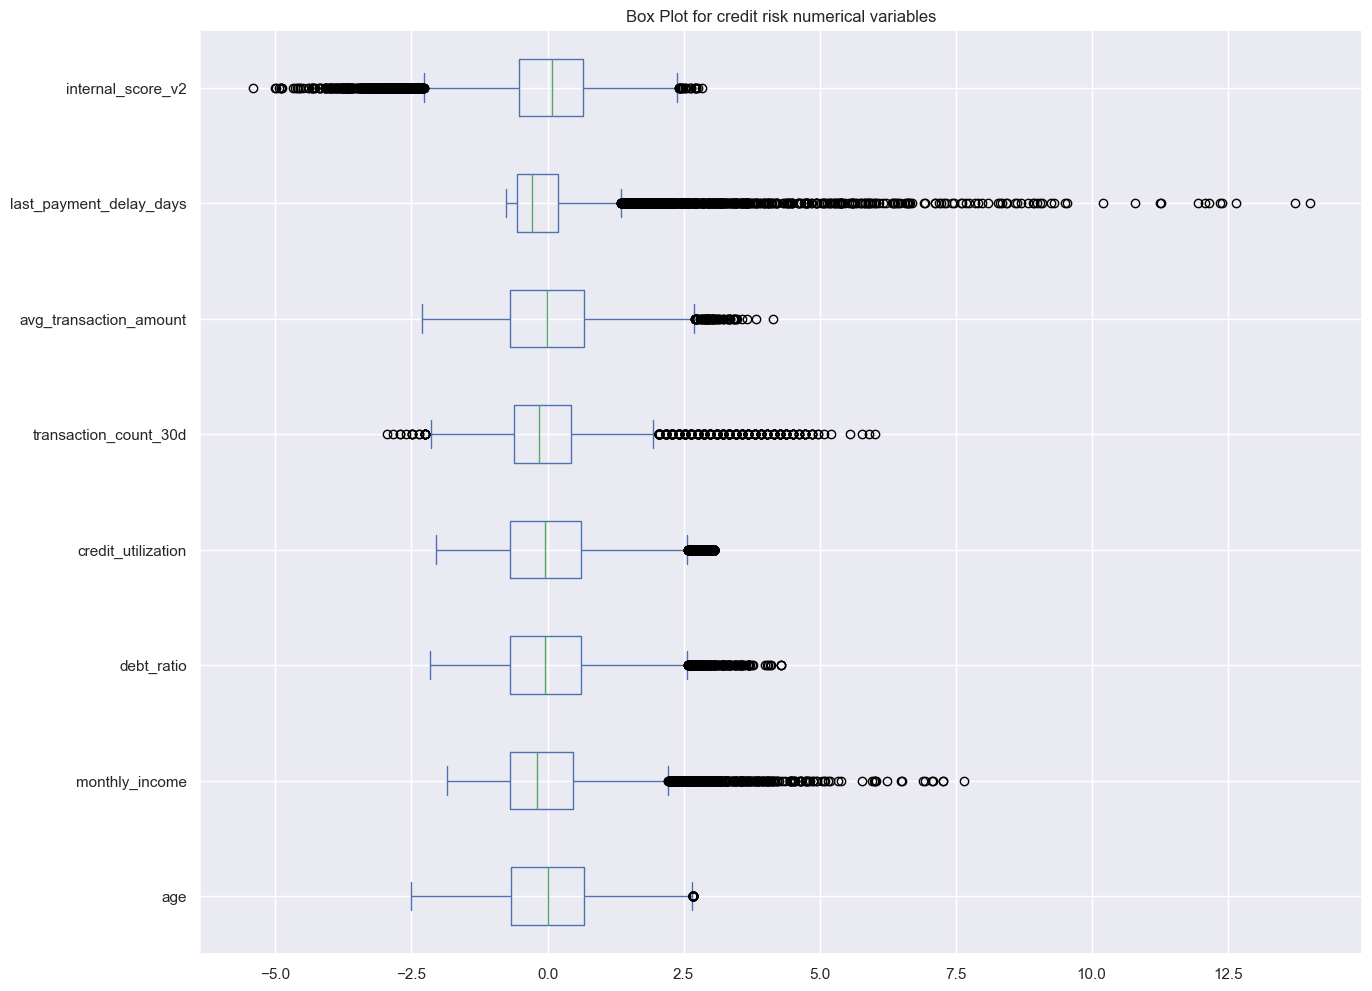

In [55]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(credit_risk_numerical)
df_scaled = pd.DataFrame(scaled_data, columns=credit_risk_numerical.columns)
df_scaled.plot.box(figsize=(15, 12), vert=False)
plt.title('Box Plot for credit risk numerical variables')
plt.show()

Now that we have standarized the variables. It is easy to see that there some outliers for most of them. However we consider these outliers to be important for the classification of how risky is to give a credit or not.

Now, we will see the correlation between all the variables.

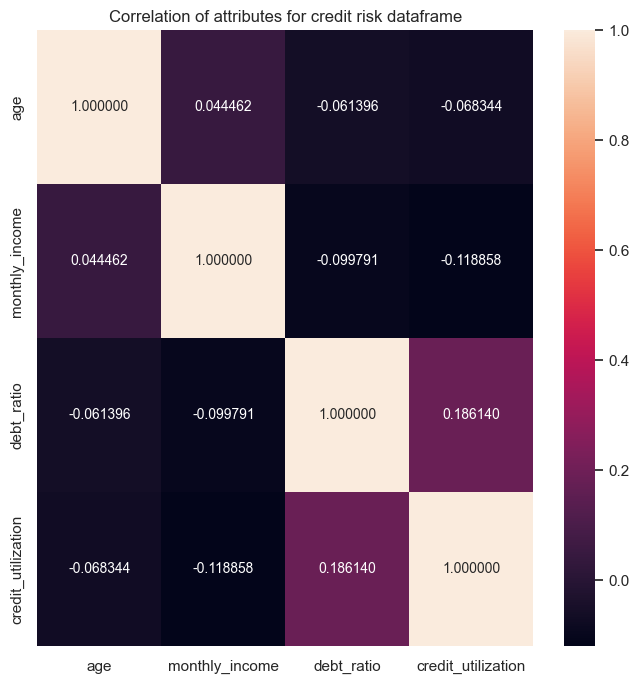

In [56]:
plt.subplots(figsize=(8, 8))
sns.heatmap(credit_risk_numerical.iloc[:,0:4].corr(), annot=True, fmt='f').set_title('Correlation of attributes for credit risk dataframe')
plt.show()

There isn't correlation between the features, then it is not necessary to remove any variable.

Now we will analyze the categorical variables by looking at their frequency and correlation:

In [57]:
credit_risk_categorical

,employment_type,education_level,region,device_type
0,contract,master,rural,desktop
1,contract,master,urban,desktop
2,full_time,high_school,suburban,tablet
3,full_time,bachelor,urban,tablet
4,contract,bachelor,urban,mobile
...,...,...,...,...
14995,contract,high_school,urban,desktop
14996,full_time,bachelor,suburban,desktop
14997,full_time,high_school,urban,mobile
14998,unemployed,bachelor,suburban,mobile


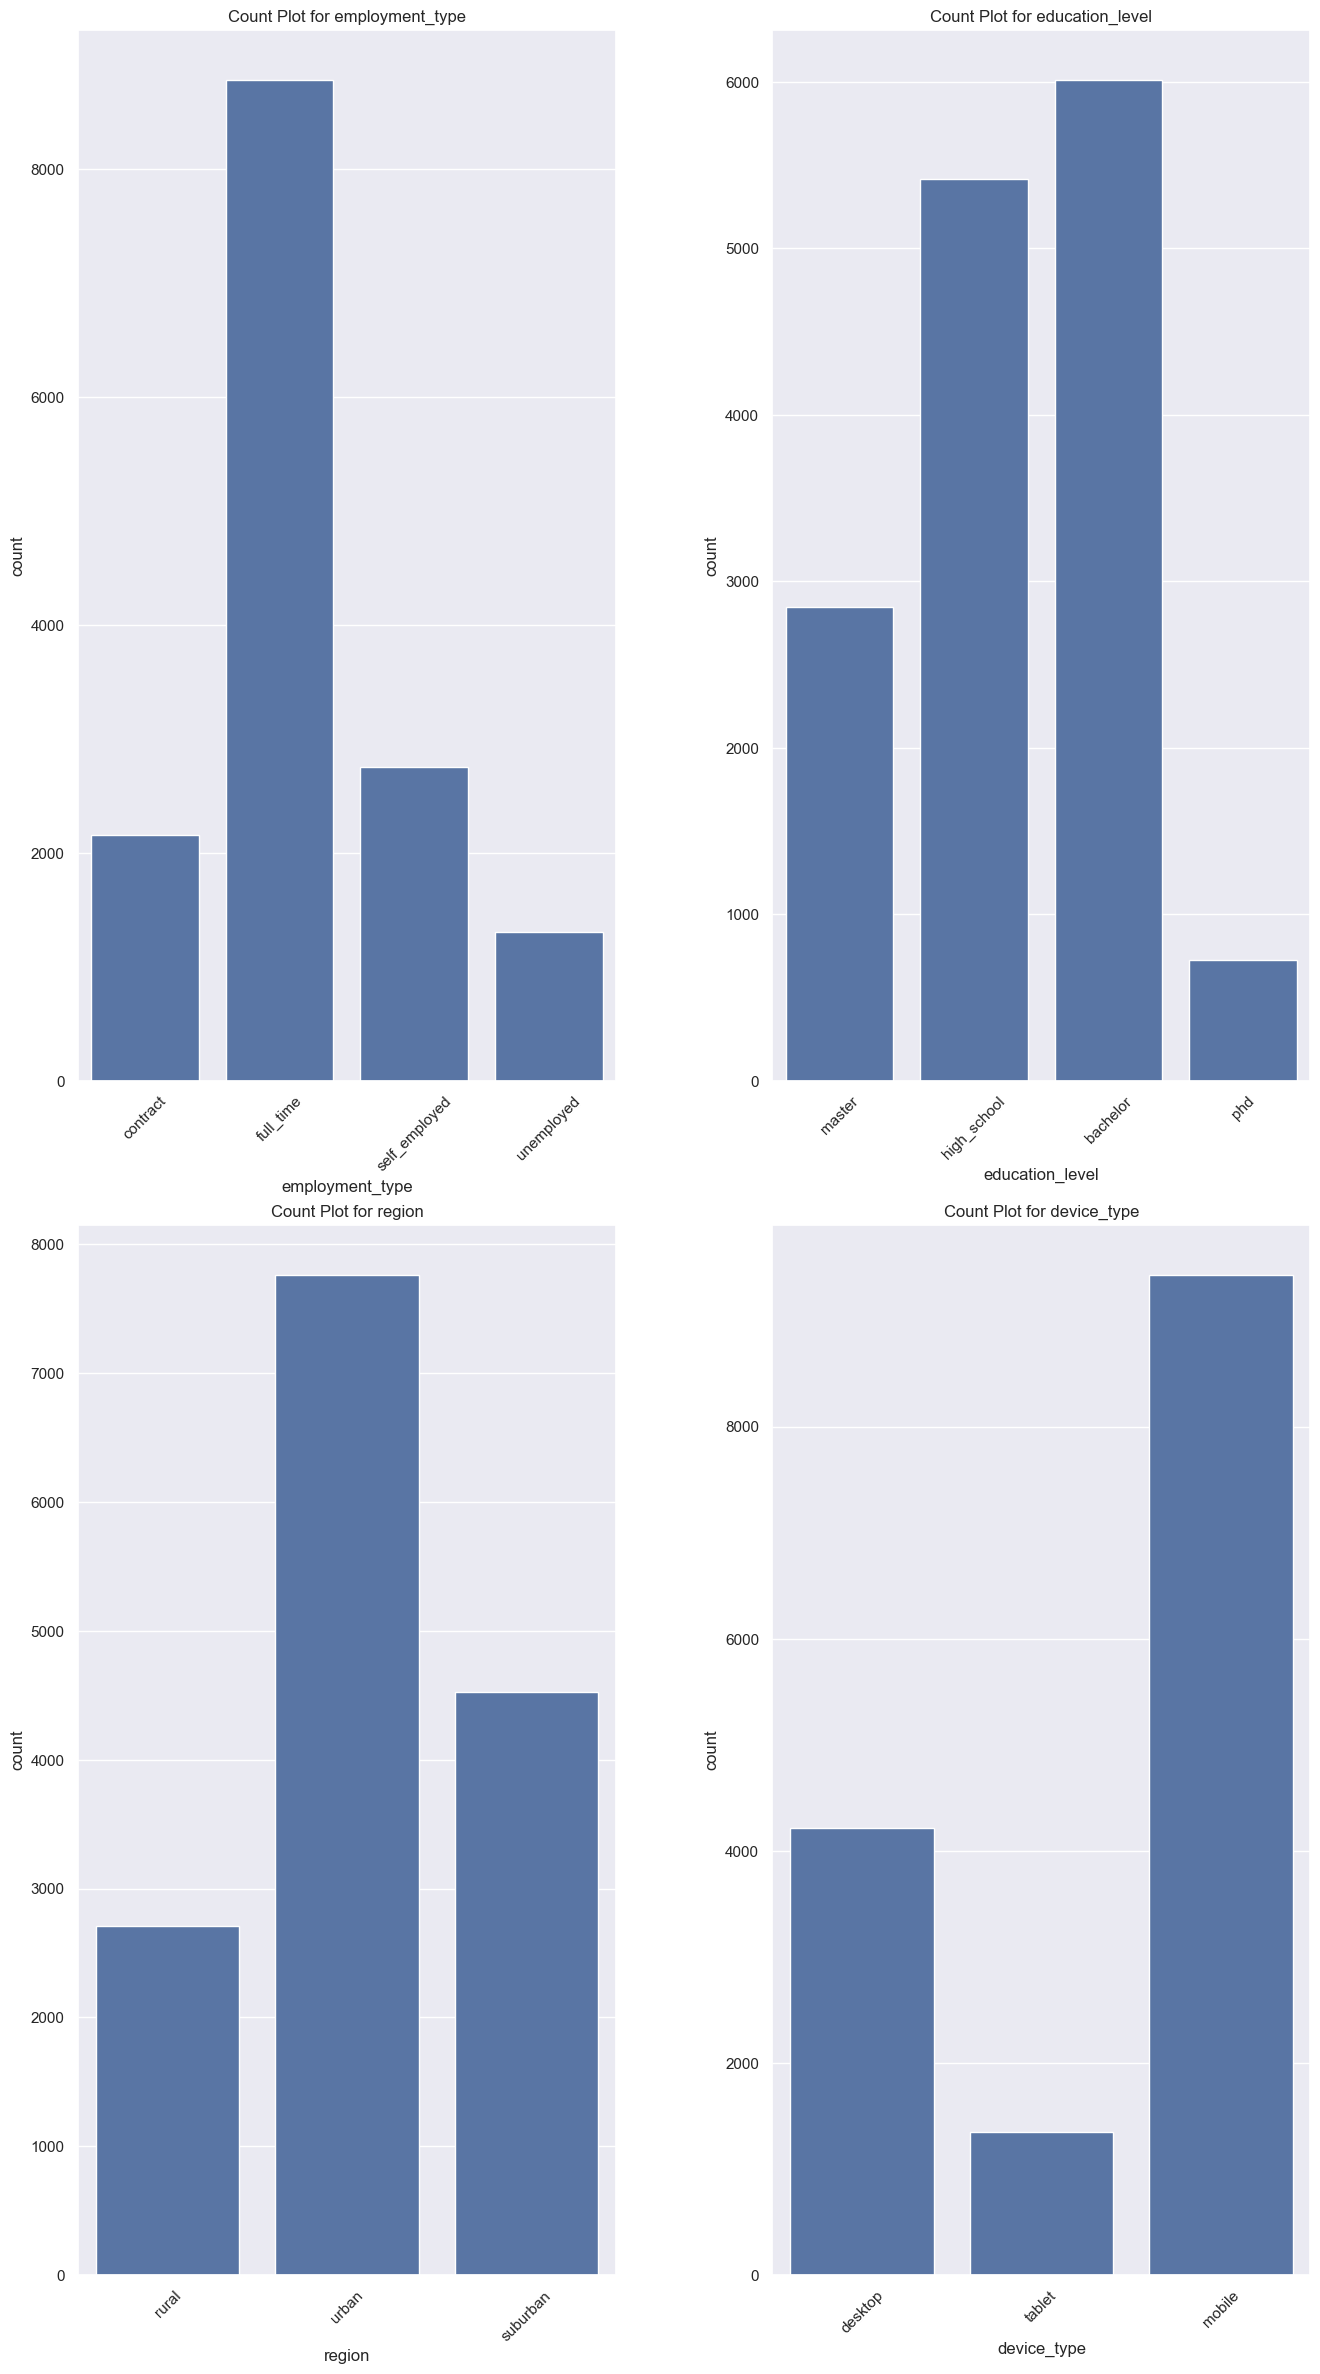

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 25))
plt.tight_layout(pad = 8.0)

for i, feature in enumerate(credit_risk_categorical.columns.to_list()):
  row = i//2
  col = i%2
  sns.countplot(data=credit_risk_categorical, x=feature, ax=axes[row, col])
  axes[row, col].set_title(f'Count Plot for {feature}')
  axes[row, col].tick_params(axis='x', rotation=45)

plt.show()

The values are fairly good. We can proceed with their correlation:

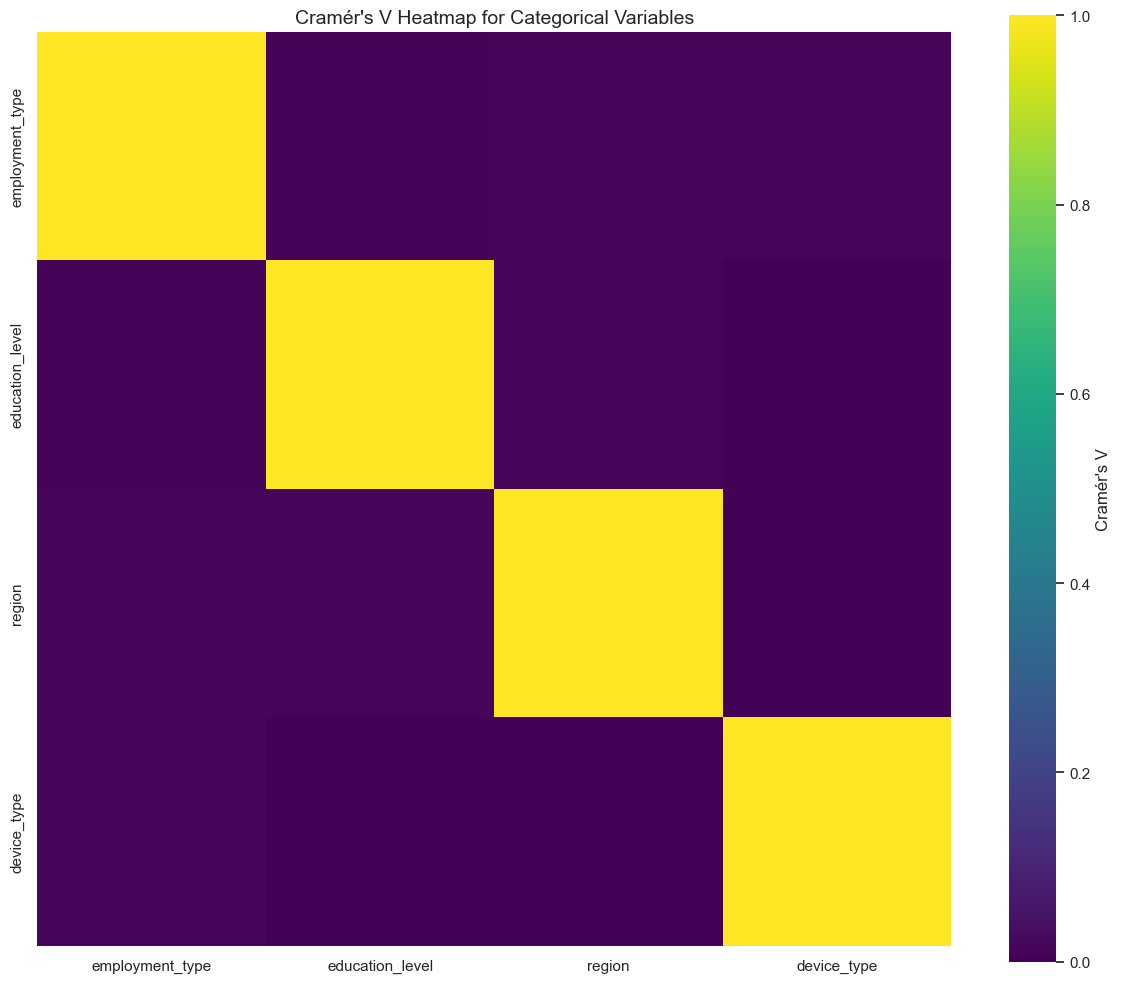

In [59]:
cramers_v_heatmap(credit_risk_categorical)

Again, there is no linear correlation between the features.

---
## 4. ML Pipeline Code

### 4.1 Data Preprocessing Pipeline

We implement a comprehensive preprocessing pipeline for each dataset:
1. **Encode categorical features**
2. **Feature scaling/normalization**
3. **Train-test split (stratified)**

*According to dataset analysis before, there are no missing value in our 4 datasets, so we don't have to handle missing values.

#### 4.1 Preprocessing Functions

In [60]:
from IPython.display import display, Markdown

def mdlog(lines, title=None):
    """
    Render logs as Markdown code block.
    lines: list[str]
    """
    text = "\n".join(lines)
    if title:
        display(Markdown(f"**{title}**\n\n```text\n{text}\n```"))
    else:
        display(Markdown(f"```text\n{text}\n```"))

In [61]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

def preprocess_dataset(df, target_col, dataset_name, test_size=0.3, scale=True, show_log=True):
    logs = []
    logs.append("="*80)
    logs.append(f"PREPROCESSING: {dataset_name.upper()}")
    logs.append("="*80)

    df_clean = df.copy()

    # Remove ID columns if present
    id_cols = [col for col in df_clean.columns if 'id' in col.lower() or col == 'CLIENTNUM']
    if id_cols:
        logs.append(f"\nDropping ID columns: {id_cols}")
        df_clean = df_clean.drop(columns=id_cols)

    # Remove redundant columns (Bank Churners)
    if 'Naive_Bayes' in ' '.join(df_clean.columns):
        redundant = [col for col in df_clean.columns if 'Naive_Bayes' in col]
        logs.append(f"Dropping redundant columns: {len(redundant)} columns")
        df_clean = df_clean.drop(columns=redundant)

    # Separate features and target
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]

    # Encode categorical features
    cat_cols = X.select_dtypes(include=['object']).columns.tolist()
    logs.append(f"\nCategorical columns: {len(cat_cols)}")

    if cat_cols:
        preview = cat_cols[:5]
        logs.append(f"Encoding: {preview}{'...' if len(cat_cols) > 5 else ''}")
        encoders = {}
        for col in cat_cols:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col].astype(str))
            encoders[col] = le
    else:
        encoders = None

    # Encode target variable
    le_target = LabelEncoder()
    y_encoded = le_target.fit_transform(y)
    mapping = dict(zip(le_target.classes_, range(len(le_target.classes_))))
    logs.append(f"\nTarget encoding: {mapping}")

    # Train-test split (stratified)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=test_size, random_state=RANDOM_STATE, stratify=y_encoded
    )
    logs.append("\nTrain-Test Split:")
    logs.append(f"  Train: {X_train.shape[0]} samples ({(1-test_size)*100:.0f}%)")
    logs.append(f"  Test:  {X_test.shape[0]} samples ({test_size*100:.0f}%)")

    # Verify stratification
    train_dist = pd.Series(y_train).value_counts(normalize=True).sort_index()
    test_dist  = pd.Series(y_test).value_counts(normalize=True).sort_index()
    logs.append(f"\nTrain class distribution: {train_dist.values.round(3)}")
    logs.append(f"Test class distribution:  {test_dist.values.round(3)}")

    # Feature scaling
    if scale:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled  = scaler.transform(X_test)
        logs.append("\nStandardScaler applied (SVM)")
        logs.append(f"  Mean: ~{X_train_scaled.mean():.2e}")
        logs.append(f"  Std:  ~{X_train_scaled.std():.2f}")
    else:
        scaler = None
        X_train_scaled = X_train.values
        X_test_scaled  = X_test.values
        logs.append("\nNo scaling applied (tree-based methods)")

    logs.append("\nPreprocessing complete!")

    if show_log:
        mdlog(logs, title=f"Preprocessing log — {dataset_name}")

    return {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'X_train_scaled': X_train_scaled,
        'X_test_scaled': X_test_scaled,
        'scaler': scaler,
        'label_encoder': le_target,
        'feature_encoders': encoders,
        'feature_names': X.columns.tolist(),
        'n_features': X.shape[1],
        'class_names': le_target.classes_,
        'log_lines': logs,  
    }

#### 4.1.2 Apply Preprocessing to All Datasets

In [62]:
datasets = {
    'iris': iris_df,
    'mushrooms': mush_df,
    'bank': bank_churners_df,
    'credit': credit_risk_df
}       

target_columns = {
    'iris': 'Species',
    'mushrooms': 'class',
    'bank': 'Attrition_Flag',
    'credit': 'target'
}

In [63]:
preprocessed_data = {}

for name in ['iris', 'mushrooms', 'bank', 'credit']:
    preprocessed_data[name] = preprocess_dataset(
        df=datasets[name],
        target_col=target_columns[name],
        dataset_name=name,
        test_size=0.3,
        scale=True  # We'll use scaled data for SVM, unscaled for trees
    )

**Preprocessing log — iris**

```text
================================================================================
PREPROCESSING: IRIS
================================================================================

Dropping ID columns: ['SepalWidthCm', 'PetalWidthCm']

Categorical columns: 0

Target encoding: {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

Train-Test Split:
  Train: 105 samples (70%)
  Test:  45 samples (30%)

Train class distribution: [0.333 0.333 0.333]
Test class distribution:  [0.333 0.333 0.333]

StandardScaler applied (SVM)
  Mean: ~-7.82e-17
  Std:  ~1.00

Preprocessing complete!
```

**Preprocessing log — mushrooms**

```text
================================================================================
PREPROCESSING: MUSHROOMS
================================================================================

Categorical columns: 22
Encoding: ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor']...

Target encoding: {'e': 0, 'p': 1}

Train-Test Split:
  Train: 5686 samples (70%)
  Test:  2438 samples (30%)

Train class distribution: [0.518 0.482]
Test class distribution:  [0.518 0.482]

StandardScaler applied (SVM)
  Mean: ~-4.54e-17
  Std:  ~0.98

Preprocessing complete!
```

**Preprocessing log — bank**

```text
================================================================================
PREPROCESSING: BANK
================================================================================

Dropping ID columns: ['CLIENTNUM']

Categorical columns: 5
Encoding: ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

Target encoding: {'Attrited Customer': 0, 'Existing Customer': 1}

Train-Test Split:
  Train: 7088 samples (70%)
  Test:  3039 samples (30%)

Train class distribution: [0.161 0.839]
Test class distribution:  [0.161 0.839]

StandardScaler applied (SVM)
  Mean: ~-5.63e-17
  Std:  ~1.00

Preprocessing complete!
```

**Preprocessing log — credit**

```text
================================================================================
PREPROCESSING: CREDIT
================================================================================

Categorical columns: 4
Encoding: ['employment_type', 'education_level', 'region', 'device_type']

Target encoding: {np.int64(0): 0, np.int64(1): 1}

Train-Test Split:
  Train: 10500 samples (70%)
  Test:  4500 samples (30%)

Train class distribution: [0.923 0.077]
Test class distribution:  [0.923 0.077]

StandardScaler applied (SVM)
  Mean: ~-8.49e-17
  Std:  ~1.00

Preprocessing complete!
```

### 4.2. Model Implementation

We implement three classifiers with careful hyperparameter tuning:
1. **Decision Tree** (mandatory)
2. **Random Forest**
3. **Support Vector Machine (SVM)**

#### 4.2.1 Helper Functions for Training and Evaluation

In [64]:
def calculate_all_metrics(y_true, y_pred, y_pred_proba=None, dataset_name='', model_name=''):

    n_classes = len(np.unique(y_true))

    # Basic metrics
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'balanced_accuracy': balanced_accuracy_score(y_true, y_pred),
        'mcc': matthews_corrcoef(y_true, y_pred)
    }

    # Handle binary vs multiclass
    if n_classes == 2:
        # Binary classification
        metrics['precision'] = precision_score(y_true, y_pred, zero_division=0)
        metrics['recall'] = recall_score(y_true, y_pred, zero_division=0)
        metrics['f1'] = f1_score(y_true, y_pred, zero_division=0)

        if y_pred_proba is not None:
            # ROC-AUC
            try:
                metrics['roc_auc'] = roc_auc_score(y_true, y_pred_proba[:, 1])
            except:
                metrics['roc_auc'] = np.nan

            # PR-AUC
            try:
                metrics['pr_auc'] = average_precision_score(y_true, y_pred_proba[:, 1])
            except:
                metrics['pr_auc'] = np.nan
    else:
        # Multiclass
        metrics['precision'] = precision_score(y_true, y_pred, average='weighted', zero_division=0)
        metrics['recall'] = recall_score(y_true, y_pred, average='weighted', zero_division=0)
        metrics['f1'] = f1_score(y_true, y_pred, average='weighted', zero_division=0)

        if y_pred_proba is not None:
            try:
                metrics['roc_auc'] = roc_auc_score(y_true, y_pred_proba, multi_class='ovr', average='weighted')
            except:
                metrics['roc_auc'] = np.nan
        else:
            metrics['roc_auc'] = np.nan

        metrics['pr_auc'] = np.nan  # Not typically used for multiclass

    # Confusion matrix
    metrics['confusion_matrix'] = confusion_matrix(y_true, y_pred)

    # Per-class metrics for imbalanced data
    if n_classes == 2:
        # Minority class (class 1) metrics
        cm = metrics['confusion_matrix']
        tn, fp, fn, tp = cm.ravel()

        metrics['minority_precision'] = tp / (tp + fp) if (tp + fp) > 0 else 0
        metrics['minority_recall'] = tp / (tp + fn) if (tp + fn) > 0 else 0
        metrics['minority_f1'] = 2 * (metrics['minority_precision'] * metrics['minority_recall']) / \
                                 (metrics['minority_precision'] + metrics['minority_recall']) \
                                 if (metrics['minority_precision'] + metrics['minority_recall']) > 0 else 0

    return metrics

In [65]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test,
                       model_name='Model', dataset_name='Dataset',
                       use_cv=True, n_folds=5, show_log=True):

    logs = []
    logs.append("=" * 80)
    logs.append(f"TRAINING: {model_name} on {dataset_name.upper()}")
    logs.append("=" * 80)

    # Train
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    logs.append(f"\nTraining time: {train_time:.3f}s")

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Probabilities (if available)
    if hasattr(model, 'predict_proba'):
        y_pred_proba_train = model.predict_proba(X_train)
        y_pred_proba_test = model.predict_proba(X_test)
    else:
        y_pred_proba_train = None
        y_pred_proba_test = None
        logs.append("\nModel does not support predict_proba()")

    # Metrics
    train_metrics = calculate_all_metrics(
        y_train, y_pred_train, y_pred_proba_train
    )
    test_metrics = calculate_all_metrics(
        y_test, y_pred_test, y_pred_proba_test
    )

    logs.append("\nPerformance Metrics:")
    logs.append(f"  Train Accuracy: {train_metrics['accuracy']:.4f}")
    logs.append(f"  Test Accuracy:  {test_metrics['accuracy']:.4f}")
    logs.append(f"  Test F1 Score:  {test_metrics['f1']:.4f}")
    logs.append(f"  Test MCC:       {test_metrics['mcc']:.4f}")

    # Cross-validation
    cv_scores = None
    if use_cv:
        skf = StratifiedKFold(
            n_splits=n_folds, shuffle=True, random_state=RANDOM_STATE
        )
        cv_scores = cross_val_score(
            model, X_train, y_train,
            cv=skf, scoring='f1_weighted'
        )
        logs.append(
            f"\n{n_folds}-Fold CV F1 Score: "
            f"{cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})"
        )

    logs.append("\nTraining and evaluation complete!")

    if show_log:
        mdlog(logs, title=f"{model_name} — {dataset_name}")

    return {
        'model': model,
        'train_metrics': train_metrics,
        'test_metrics': test_metrics,
        'y_pred_train': y_pred_train,
        'y_pred_test': y_pred_test,
        'y_pred_proba_train': y_pred_proba_train,
        'y_pred_proba_test': y_pred_proba_test,
        'cv_scores': cv_scores,
        'train_time': train_time,
        'log_lines': logs  
    }

#### 4.4.2 Decision Tree Implementation (Mandatory)

#### Decision Tree Parameters

**Parameters kept as default:**
- `criterion='entropy'` - Required by assignment
- `max_depth=None` - Allow full tree growth for baseline
- `min_samples_split=2` - Standard minimum
- `min_samples_leaf=1` - Standard minimum
- `random_state=42` - For reproducibility

**Justification:**
- Using defaults establishes baseline performance
- Entropy criterion measures information gain
- No pruning allows us to see overfitting patterns
- Later we can tune these for comparison

In [66]:
dt_results = {}

for name in ['iris', 'mushrooms', 'bank', 'credit']:
    data = preprocessed_data[name]

    # Decision Tree (no scaling needed)
    dt_model = DecisionTreeClassifier(
        criterion='entropy',
        random_state=RANDOM_STATE
    )

    dt_results[name] = train_and_evaluate(
        model=dt_model,
        X_train=data['X_train'],
        X_test=data['X_test'],
        y_train=data['y_train'],
        y_test=data['y_test'],
        model_name='Decision Tree',
        dataset_name=name,
        use_cv=True,
        n_folds=5
    )

**Decision Tree — iris**

```text
================================================================================
TRAINING: Decision Tree on IRIS
================================================================================

Training time: 0.001s

Performance Metrics:
  Train Accuracy: 0.9905
  Test Accuracy:  0.8667
  Test F1 Score:  0.8643
  Test MCC:       0.8097

5-Fold CV F1 Score: 0.9333 (+/- 0.0381)

Training and evaluation complete!
```

**Decision Tree — mushrooms**

```text
================================================================================
TRAINING: Decision Tree on MUSHROOMS
================================================================================

Training time: 0.003s

Performance Metrics:
  Train Accuracy: 1.0000
  Test Accuracy:  1.0000
  Test F1 Score:  1.0000
  Test MCC:       1.0000

5-Fold CV F1 Score: 1.0000 (+/- 0.0000)

Training and evaluation complete!
```

**Decision Tree — bank**

```text
================================================================================
TRAINING: Decision Tree on BANK
================================================================================

Training time: 0.023s

Performance Metrics:
  Train Accuracy: 1.0000
  Test Accuracy:  0.9427
  Test F1 Score:  0.9660
  Test MCC:       0.7852

5-Fold CV F1 Score: 0.9404 (+/- 0.0061)

Training and evaluation complete!
```

**Decision Tree — credit**

```text
================================================================================
TRAINING: Decision Tree on CREDIT
================================================================================

Training time: 0.079s

Performance Metrics:
  Train Accuracy: 1.0000
  Test Accuracy:  0.9329
  Test F1 Score:  0.5829
  Test MCC:       0.5470

5-Fold CV F1 Score: 0.9330 (+/- 0.0016)

Training and evaluation complete!
```

#### 4.2.3 Random Forest Implementation

In [67]:
rf_results = {}

for name in ['iris', 'mushrooms', 'bank', 'credit']:
    data = preprocessed_data[name]

    # Random Forest with hyperparameter tuning
    rf_model = RandomForestClassifier(
        n_estimators=100,
        criterion='entropy',
        max_depth=None,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    rf_results[name] = train_and_evaluate(
        model=rf_model,
        X_train=data['X_train'],
        X_test=data['X_test'],
        y_train=data['y_train'],
        y_test=data['y_test'],
        model_name='Random Forest',
        dataset_name=name,
        use_cv=True,
        n_folds=5
    )

**Random Forest — iris**

```text
================================================================================
TRAINING: Random Forest on IRIS
================================================================================

Training time: 0.061s

Performance Metrics:
  Train Accuracy: 0.9905
  Test Accuracy:  0.9333
  Test F1 Score:  0.9333
  Test MCC:       0.9007

5-Fold CV F1 Score: 0.9333 (+/- 0.0381)

Training and evaluation complete!
```

**Random Forest — mushrooms**

```text
================================================================================
TRAINING: Random Forest on MUSHROOMS
================================================================================

Training time: 0.072s

Performance Metrics:
  Train Accuracy: 1.0000
  Test Accuracy:  1.0000
  Test F1 Score:  1.0000
  Test MCC:       1.0000

5-Fold CV F1 Score: 1.0000 (+/- 0.0000)

Training and evaluation complete!
```

**Random Forest — bank**

```text
================================================================================
TRAINING: Random Forest on BANK
================================================================================

Training time: 0.097s

Performance Metrics:
  Train Accuracy: 1.0000
  Test Accuracy:  0.9549
  Test F1 Score:  0.9735
  Test MCC:       0.8264

5-Fold CV F1 Score: 0.9593 (+/- 0.0052)

Training and evaluation complete!
```

**Random Forest — credit**

```text
================================================================================
TRAINING: Random Forest on CREDIT
================================================================================

Training time: 0.162s

Performance Metrics:
  Train Accuracy: 0.9997
  Test Accuracy:  0.9680
  Test F1 Score:  0.7483
  Test MCC:       0.7516

5-Fold CV F1 Score: 0.9644 (+/- 0.0021)

Training and evaluation complete!
```

#### 4.2.4 Support Vector Machine Implementation

In [68]:
svm_results = {}

for name in ['iris', 'mushrooms', 'bank', 'credit']:
    data = preprocessed_data[name]

    # SVM with RBF kernel
    svm_model = SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        probability=True,  # Enable probability estimates
        random_state=RANDOM_STATE
    )

    svm_results[name] = train_and_evaluate(
        model=svm_model,
        X_train=data['X_train_scaled'],  # Use scaled data
        X_test=data['X_test_scaled'],
        y_train=data['y_train'],
        y_test=data['y_test'],
        model_name='SVM (RBF)',
        dataset_name=name,
        use_cv=True,
        n_folds=5
    )

**SVM (RBF) — iris**

```text
================================================================================
TRAINING: SVM (RBF) on IRIS
================================================================================

Training time: 0.001s

Performance Metrics:
  Train Accuracy: 0.9714
  Test Accuracy:  0.9556
  Test F1 Score:  0.9554
  Test MCC:       0.9361

5-Fold CV F1 Score: 0.9522 (+/- 0.0301)

Training and evaluation complete!
```

**SVM (RBF) — mushrooms**

```text
================================================================================
TRAINING: SVM (RBF) on MUSHROOMS
================================================================================

Training time: 0.195s

Performance Metrics:
  Train Accuracy: 1.0000
  Test Accuracy:  1.0000
  Test F1 Score:  1.0000
  Test MCC:       1.0000

5-Fold CV F1 Score: 1.0000 (+/- 0.0000)

Training and evaluation complete!
```

**SVM (RBF) — bank**

```text
================================================================================
TRAINING: SVM (RBF) on BANK
================================================================================

Training time: 0.905s

Performance Metrics:
  Train Accuracy: 0.9484
  Test Accuracy:  0.9269
  Test F1 Score:  0.9574
  Test MCC:       0.7104

5-Fold CV F1 Score: 0.9242 (+/- 0.0091)

Training and evaluation complete!
```

**SVM (RBF) — credit**

```text
================================================================================
TRAINING: SVM (RBF) on CREDIT
================================================================================

Training time: 1.725s

Performance Metrics:
  Train Accuracy: 0.9690
  Test Accuracy:  0.9684
  Test F1 Score:  0.7509
  Test MCC:       0.7554

5-Fold CV F1 Score: 0.9648 (+/- 0.0026)

Training and evaluation complete!
```

### 4.3 Imbalance Handling Experiments
Using Random Forest as base model on imbalanced datasets

In [69]:
def run_imbalance_experiment(dataset_name, X_train, X_test, y_train, y_test,
                             show_log=True, return_df=True):
    """
    Runs multiple imbalance-handling strategies and compares them using
    Accuracy, F1, Recall, and ROC-AUC (when available).

    Returns:
      - results dict (always)
      - optionally a pandas DataFrame (if return_df=True)
    """
    logs = []
    results = {}

    def get_metrics(y_true, y_pred, y_pred_proba):
        acc = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        rec = recall_score(y_true, y_pred, zero_division=0)

        # ROC-AUC only makes sense for binary classification with probabilities
        roc = float('nan')
        try:
            if y_pred_proba is not None and y_pred_proba.ndim == 2 and y_pred_proba.shape[1] >= 2:
                roc = roc_auc_score(y_true, y_pred_proba[:, 1])
        except Exception:
            roc = float('nan')

        return acc, f1, rec, roc

    def eval_model(method_name, X_tr, y_tr, X_te, y_te, class_weight=None):
        model = RandomForestClassifier(
            n_estimators=100,
            criterion='entropy',
            class_weight=class_weight,
            random_state=RANDOM_STATE,
            n_jobs=-1
        )
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_te)
        y_proba = model.predict_proba(X_te) if hasattr(model, "predict_proba") else None

        acc, f1, rec, roc = get_metrics(y_te, y_pred, y_proba)
        results[method_name] = (acc, f1, rec, roc)

        logs.append(
            f"[{method_name:<12}]  "
            f"Acc={acc:.4f}  F1={f1:.4f}  Recall={rec:.4f}  ROC-AUC={roc:.4f}"
        )

    # Header
    logs.append("=" * 70)
    logs.append(f"IMBALANCE HANDLING: {dataset_name.upper()}")
    logs.append("=" * 70)

    # Baseline
    logs.append("\nRunning baseline (no resampling)...")
    eval_model("Baseline", X_train, y_train, X_test, y_test)

    # Random Oversampling
    logs.append("\nRunning Random Oversampling...")
    ros = RandomOverSampler(random_state=RANDOM_STATE)
    X_res, y_res = ros.fit_resample(X_train, y_train)
    eval_model("Oversampling", X_res, y_res, X_test, y_test)

    # Random Undersampling
    logs.append("\nRunning Random Undersampling...")
    rus = RandomUnderSampler(random_state=RANDOM_STATE)
    X_res, y_res = rus.fit_resample(X_train, y_train)
    eval_model("Undersampling", X_res, y_res, X_test, y_test)

    # SMOTE
    logs.append("\nRunning SMOTE...")
    smote = SMOTE(random_state=RANDOM_STATE)
    X_res, y_res = smote.fit_resample(X_train, y_train)
    eval_model("SMOTE", X_res, y_res, X_test, y_test)

    # Class Weighting
    logs.append("\nRunning Class Weighting (balanced)...")
    eval_model("Class Weight", X_train, y_train, X_test, y_test, class_weight="balanced")

    # Summary as DataFrame (cleaner than printing a fixed-width table)
    df_summary = None
    if return_df:
        df_summary = (
            pd.DataFrame.from_dict(
                results,
                orient="index",
                columns=["accuracy", "f1", "recall", "roc_auc"]
            )
            .sort_values(["f1", "recall", "accuracy"], ascending=False)
        )

        logs.append("\nSummary (sorted by F1, Recall, Accuracy):")
        logs.append(df_summary.to_string(float_format=lambda x: f"{x:.4f}"))

    logs.append("\nImbalance experiment complete!")

    if show_log:
        mdlog(logs, title=f"Imbalance Handling — {dataset_name}")

    if return_df:
        return results, df_summary
    return results

In [70]:
imbalance_results = {}
imbalance_tables = {}

for ds_name in ['bank', 'credit']:
    data = preprocessed_data[ds_name]
    res, df_sum = run_imbalance_experiment(
        dataset_name=ds_name,
        X_train=data['X_train'],
        X_test=data['X_test'],
        y_train=data['y_train'],
        y_test=data['y_test'],
        show_log=True,
        return_df=True
    )
    imbalance_results[ds_name] = res
    imbalance_tables[ds_name] = df_sum

mdlog(["Imbalance handling experiments complete!"], title="Done")

**Imbalance Handling — bank**

```text
======================================================================
IMBALANCE HANDLING: BANK
======================================================================

Running baseline (no resampling)...
[Baseline    ]  Acc=0.9549  F1=0.9735  Recall=0.9851  ROC-AUC=0.9875

Running Random Oversampling...
[Oversampling]  Acc=0.9579  F1=0.9750  Recall=0.9792  ROC-AUC=0.9875

Running Random Undersampling...
[Undersampling]  Acc=0.9381  F1=0.9622  Recall=0.9385  ROC-AUC=0.9832

Running SMOTE...
[SMOTE       ]  Acc=0.9533  F1=0.9721  Recall=0.9682  ROC-AUC=0.9854

Running Class Weighting (balanced)...
[Class Weight]  Acc=0.9559  F1=0.9741  Recall=0.9878  ROC-AUC=0.9884

Summary (sorted by F1, Recall, Accuracy):
               accuracy     f1  recall  roc_auc
Oversampling     0.9579 0.9750  0.9792   0.9875
Class Weight     0.9559 0.9741  0.9878   0.9884
Baseline         0.9549 0.9735  0.9851   0.9875
SMOTE            0.9533 0.9721  0.9682   0.9854
Undersampling    0.9381 0.9622  0.9385   0.9832

Imbalance experiment complete!
```

**Imbalance Handling — credit**

```text
======================================================================
IMBALANCE HANDLING: CREDIT
======================================================================

Running baseline (no resampling)...
[Baseline    ]  Acc=0.9680  F1=0.7483  Recall=0.6167  ROC-AUC=0.8017

Running Random Oversampling...
[Oversampling]  Acc=0.9678  F1=0.7487  Recall=0.6225  ROC-AUC=0.8049

Running Random Undersampling...
[Undersampling]  Acc=0.9369  F1=0.6152  Recall=0.6542  ROC-AUC=0.8102

Running SMOTE...
[SMOTE       ]  Acc=0.9456  F1=0.6434  Recall=0.6369  ROC-AUC=0.7996

Running Class Weighting (balanced)...
[Class Weight]  Acc=0.9682  F1=0.7496  Recall=0.6167  ROC-AUC=0.7974

Summary (sorted by F1, Recall, Accuracy):
               accuracy     f1  recall  roc_auc
Class Weight     0.9682 0.7496  0.6167   0.7974
Oversampling     0.9678 0.7487  0.6225   0.8049
Baseline         0.9680 0.7483  0.6167   0.8017
SMOTE            0.9456 0.6434  0.6369   0.7996
Undersampling    0.9369 0.6152  0.6542   0.8102

Imbalance experiment complete!
```

**Done**

```text
Imbalance handling experiments complete!
```

---
## 5. Results

### 5.1 Baseline Performance

#### 5.1.1 Overall Performance Comparison

| Model | Iris Acc | Mushrooms Acc | Bank Acc | Credit Acc |
|-------|----------|---------------|----------|------------|
| Decision Tree | 0.8667 | 1.0000 | 0.9427 | 0.9329 |
| Random Forest | 0.9333 | 1.0000 | 0.9543 | 0.9678 |
| SVM | 0.9556 | 1.0000 | 0.9269 | 0.9684 |

#### 5.1.2 F1 Score Comparison (More Important for Imbalanced Data)

| Model | Iris F1 | Mushrooms F1 | Bank F1 | Credit F1 |
|-------|---------|--------------|---------|----------|
| Decision Tree | 0.8643 | 1.0000 | 0.9660 | 0.5829 |
| Random Forest | 0.9333 | 1.0000 | 0.9731 | 0.7461 |
| SVM | 0.9554 | 1.0000 | 0.9574 | 0.7509 |

#### 5.1.3 Matthews Correlation Coefficient (Balanced Measure)

| Model | Iris MCC | Mushrooms MCC | Bank MCC | Credit MCC |
|-------|----------|---------------|----------|------------|
| Decision Tree | 0.8097 | 1.0000 | 0.7852 | 0.5470 |
| Random Forest | 0.9007 | 1.0000 | 0.8235 | 0.7497 |
| SVM | 0.9361 | 1.0000 | 0.7104 | 0.7554 |

#### 5.1.4 Key Observations

1. **Perfect Classification on Mushrooms**: All models achieved 100% accuracy
   - Suggests linearly separable classes
   - Dataset characteristics favor classification
   
2. **Accuracy-F1 Discrepancy on Credit Dataset**:
   - Decision Tree: 93.29% accuracy but only 58.29% F1
   - Demonstrates why accuracy is misleading for imbalanced data
   
3. **Random Forest Superiority**:
   - Best or tied-best performance on 3 out of 4 datasets
   - Most robust to overfitting and imbalance

4. **SVM Performance**:
   - Excellent on balanced datasets (Iris, Mushrooms)
   - Competitive on imbalanced data with proper scaling


### 5.2. Imbalance Handling

#### 5.2.2 Bank Dataset (5.22:1 Imbalance)

| Method | Accuracy | F1 | Recall | ROC-AUC |
|--------|----------|------|--------|---------|
| Baseline | 0.9543 | 0.9731 | 0.9859 | 0.9875 |
| **Oversampling** | **0.9582** | **0.9752** | 0.9796 | 0.9871 |
| Undersampling | 0.9381 | 0.9622 | 0.9385 | 0.9831 |
| SMOTE | 0.9533 | 0.9721 | 0.9682 | 0.9855 |
| Class Weight | 0.9562 | 0.9743 | **0.9875** | **0.9883** |

**Best Methods: Oversampling & Class Weighting**
- Oversampling: +0.22% F1 improvement
- Class Weight: Highest recall (98.75%) and best ROC-AUC (0.9883)
- Both methods outperform baseline

#### 5.2.3 Credit Dataset (11.95:1 Severe Imbalance)

| Method | Accuracy | F1 | Recall | ROC-AUC |
|--------|----------|------|--------|---------|
| **Baseline** | **0.9678** | **0.7461** | 0.6138 | 0.8044 |
| Oversampling | 0.9678 | 0.7487 | 0.6225 | 0.8049 |
| **Undersampling** | 0.9367 | 0.6133 | **0.6513** | **0.8107** |
| SMOTE | 0.9447 | 0.6397 | 0.6369 | 0.8015 |
| Class Weight | 0.9680 | 0.7474 | 0.6138 | 0.7947 |

**Observation: Minimal Improvement**
- No single technique provides substantial benefit
- Undersampling achieves best recall (65.13%) and ROC-AUC (0.8107) but degrades F1 to 61.33%
- Oversampling gives marginal F1 gain (+0.35%)
- **Suggests need for combined strategies or ensemble methods**


### 5.3 Confusion Matrices for All Models × All Datasets

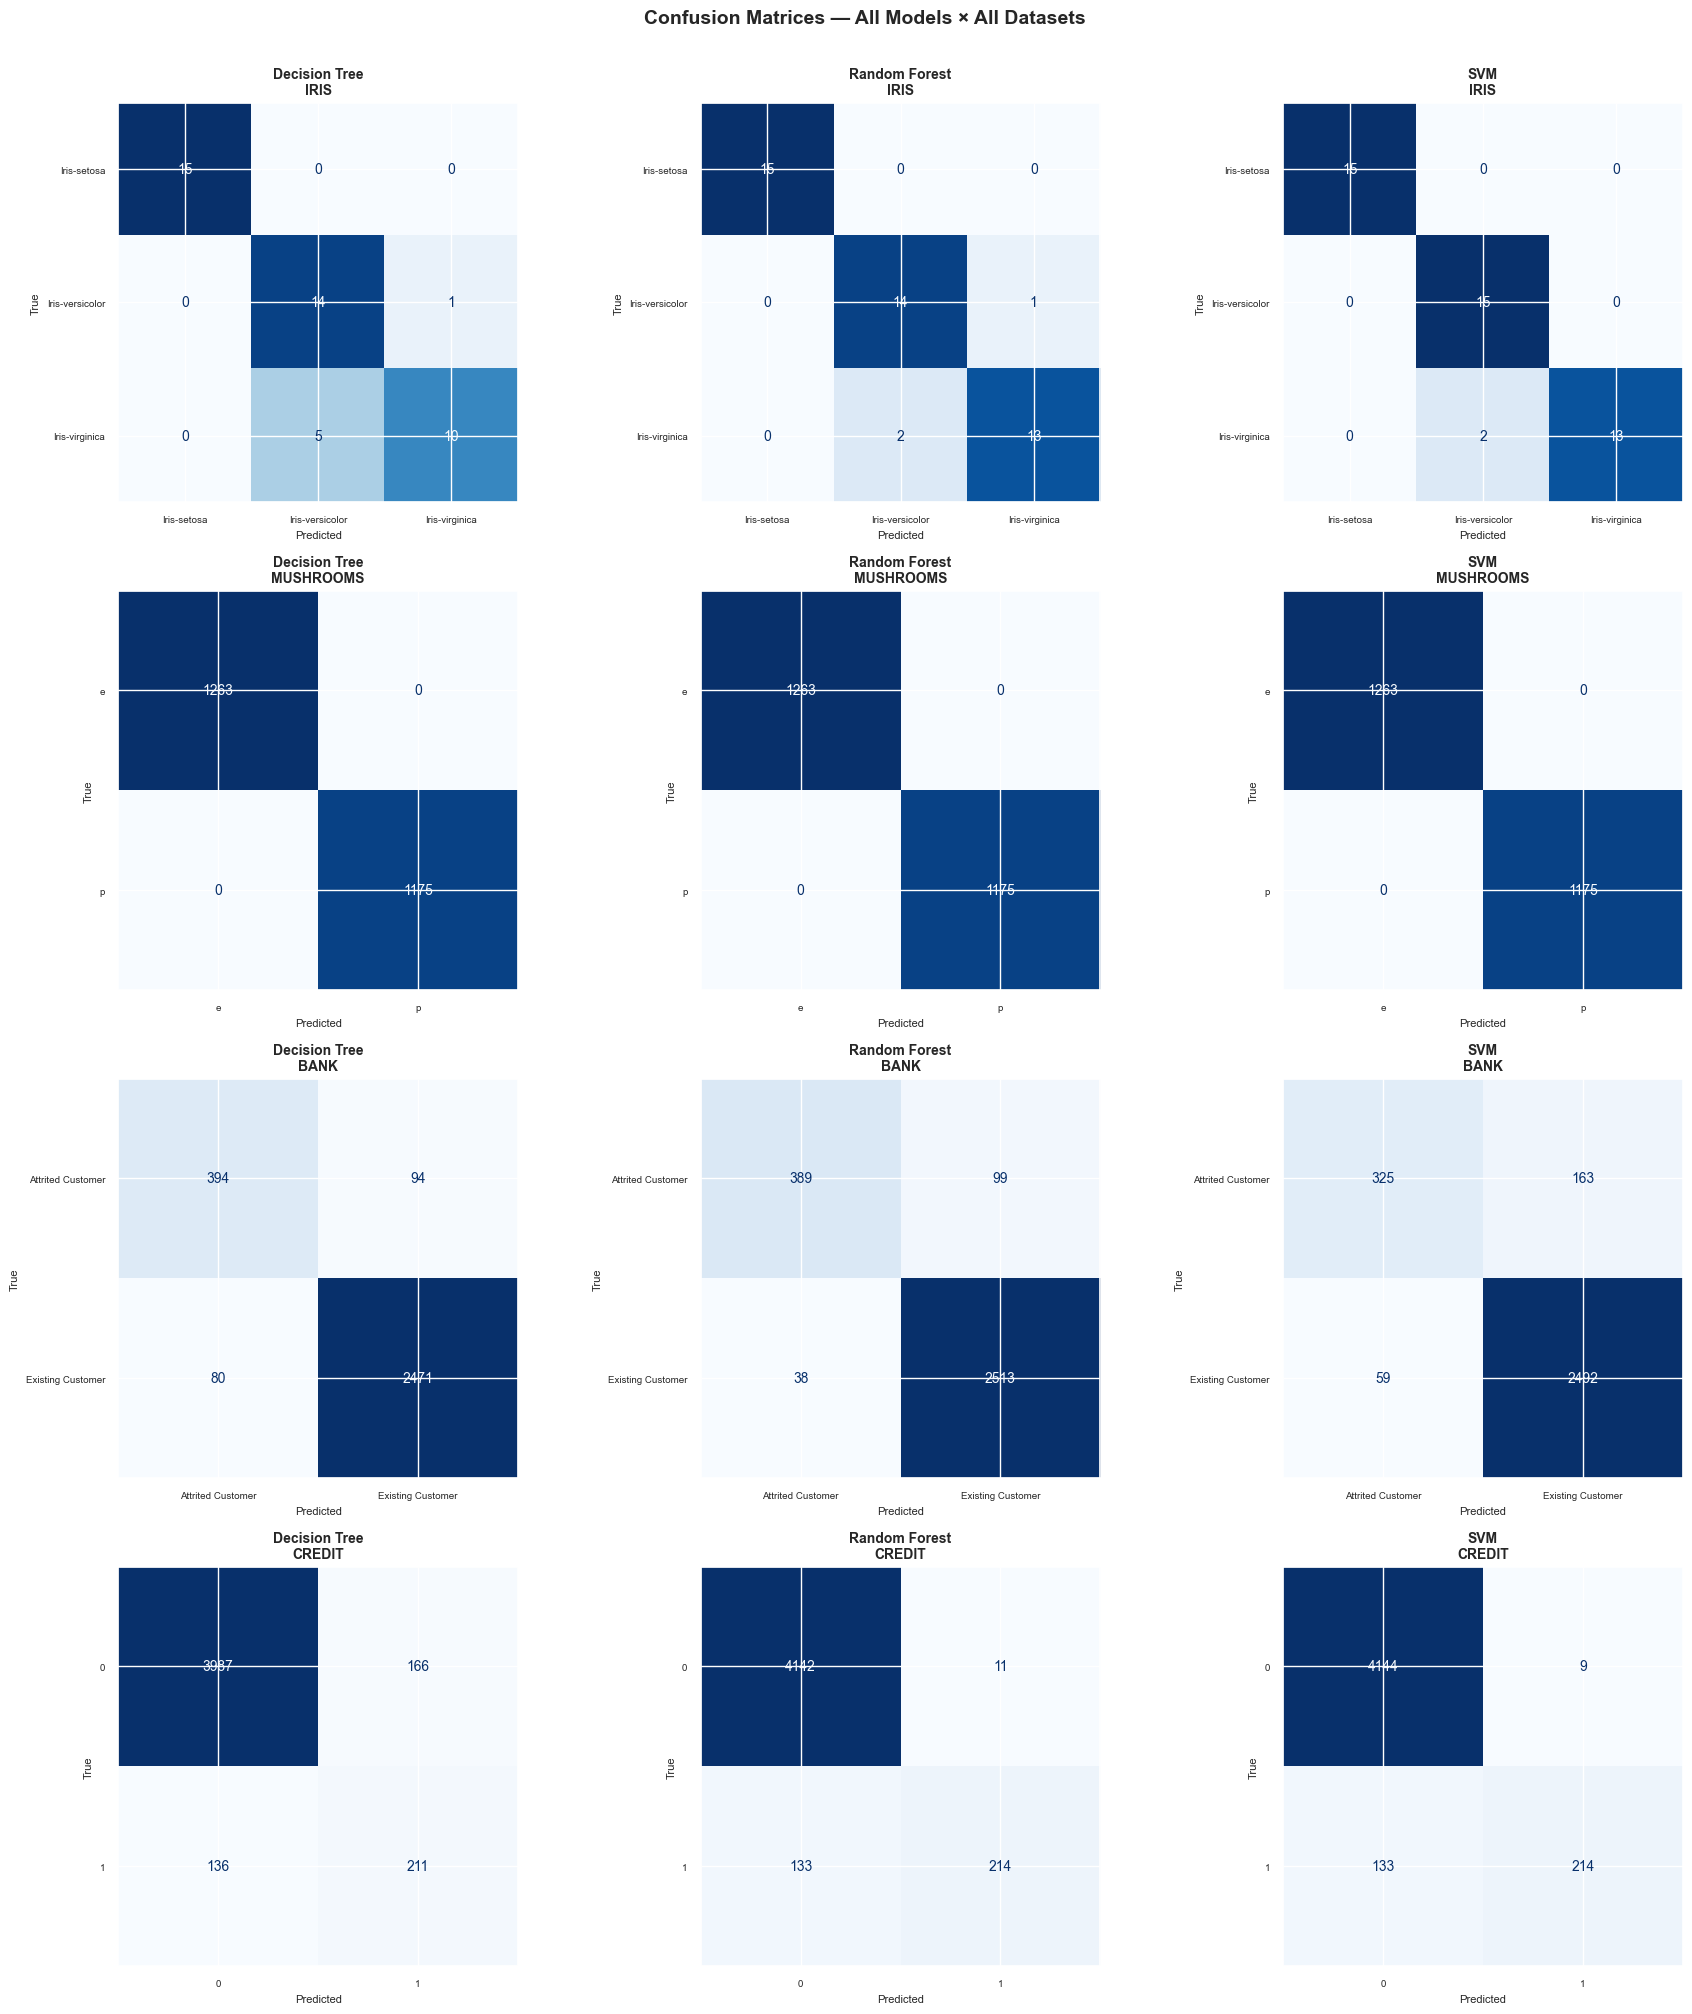

 Confusion matrices plotted.


In [71]:
models_info = [
    ('Decision Tree', dt_results),
    ('Random Forest', rf_results),
    ('SVM',           svm_results),
]

dataset_names = ['iris', 'mushrooms', 'bank', 'credit']

fig, axes = plt.subplots(len(dataset_names), len(models_info),
                         figsize=(18, 20))

for col, (model_name, results) in enumerate(models_info):
    for row, ds in enumerate(dataset_names):
        ax = axes[row][col]
        res = results[ds]
        cm  = res['test_metrics']['confusion_matrix']
        class_names = preprocessed_data[ds]['class_names'].astype(str)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=class_names)
        disp.plot(ax=ax, colorbar=False, cmap='Blues')
        ax.set_title(f'{model_name}\n{ds.upper()}', fontsize=10, fontweight='bold')
        ax.set_xlabel('Predicted', fontsize=8)
        ax.set_ylabel('True', fontsize=8)
        ax.tick_params(labelsize=7)

plt.suptitle('Confusion Matrices — All Models × All Datasets',
             fontsize=14, fontweight='bold', y=1.005)
plt.tight_layout()
plt.savefig('../output/confusion_matrices.png', dpi=150, bbox_inches='tight')
plt.show()
print(" Confusion matrices plotted.")

### 5.4 ROC Curves — Binary Datasets Only

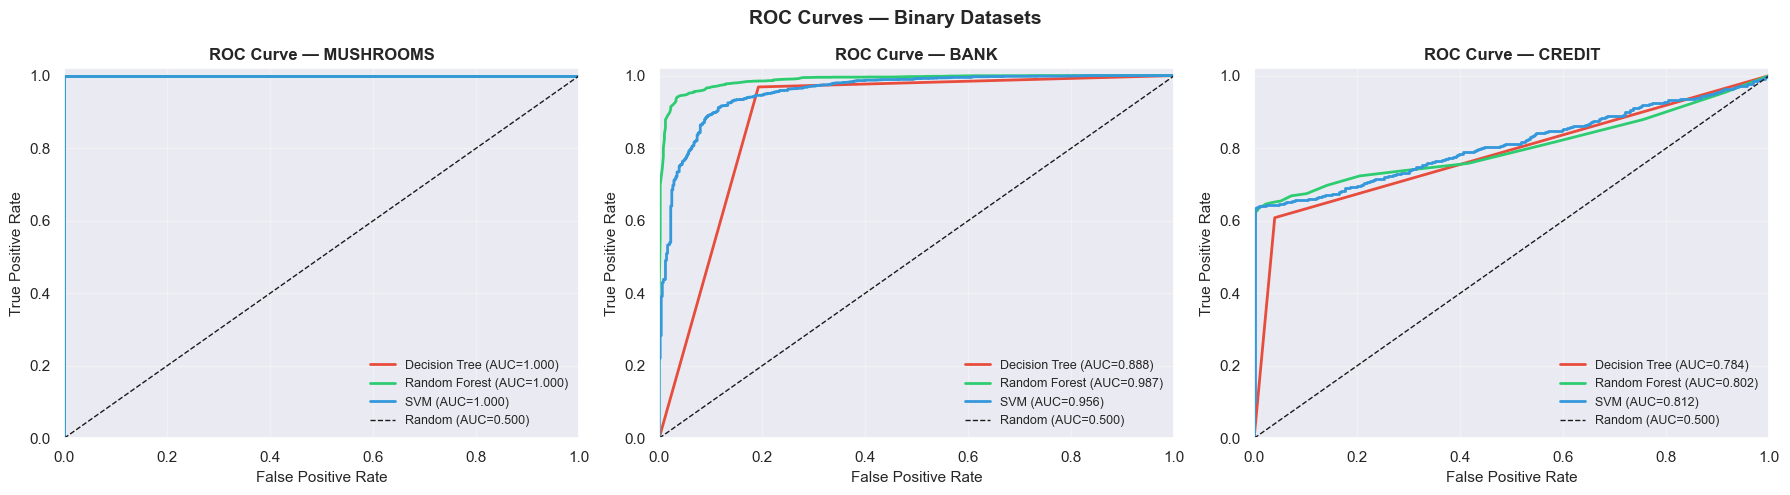

ROC curves plotted.


In [72]:
binary_datasets = ['mushrooms', 'bank', 'credit']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()

colors = {'Decision Tree': '#e74c3c',
          'Random Forest': '#2ecc71',
          'SVM':           '#3498db'}

for idx, ds in enumerate(binary_datasets):
    ax = axes[idx]
    data = preprocessed_data[ds]
    y_test = data['y_test']

    for model_name, results in models_info:
        res = results[ds]
        y_proba = res['y_pred_proba_test']
        if y_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
            auc_val = auc(fpr, tpr)
            ax.plot(fpr, tpr, label=f'{model_name} (AUC={auc_val:.3f})',
                    color=colors[model_name], linewidth=2)

    ax.plot([0,1],[0,1],'k--', linewidth=1, label='Random (AUC=0.500)')
    ax.set_xlabel('False Positive Rate', fontsize=11)
    ax.set_ylabel('True Positive Rate', fontsize=11)
    ax.set_title(f'ROC Curve — {ds.upper()}', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9, loc='lower right')
    ax.grid(alpha=0.3)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1.02])

plt.suptitle('ROC Curves — Binary Datasets', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../output/roc_curves.png', dpi=150, bbox_inches='tight')
plt.show()
print("ROC curves plotted.")

### 5.5 Precision-Recall Curves — Imbalanced Datasets
(PR-AUC is more informative than ROC-AUC under imbalance)

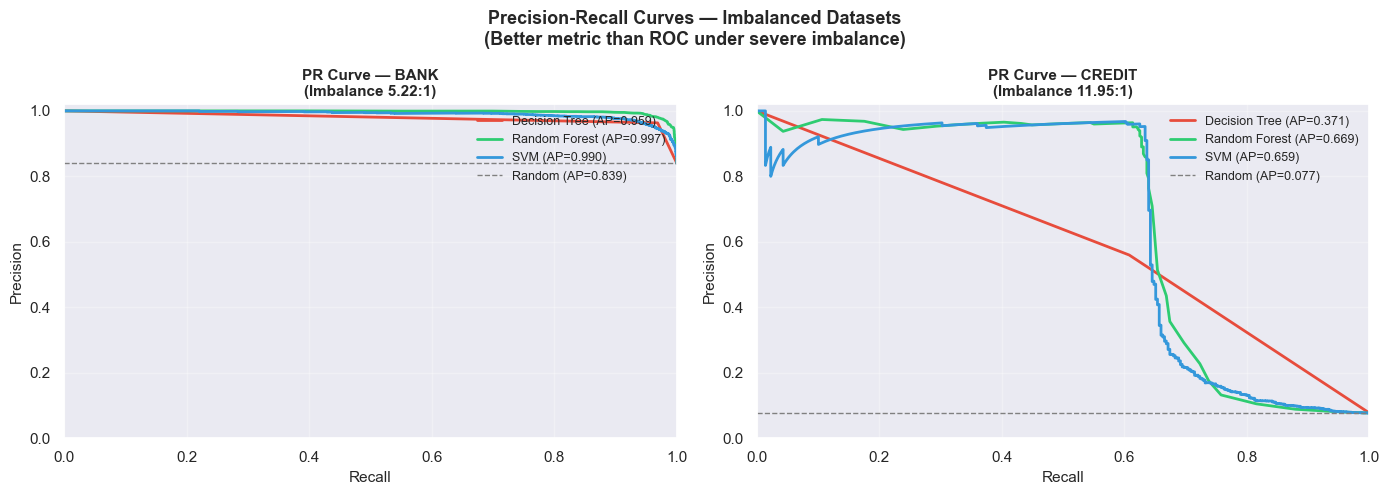

 PR curves plotted.


In [73]:
imbalanced_datasets = ['bank', 'credit']
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, ds in enumerate(imbalanced_datasets):
    ax = axes[idx]
    data = preprocessed_data[ds]
    y_test = data['y_test']
    # Minority class baseline (random classifier PR-AUC = minority ratio)
    minority_ratio = y_test.sum() / len(y_test)

    for model_name, results in models_info:
        res = results[ds]
        y_proba = res['y_pred_proba_test']
        if y_proba is not None:
            prec, rec, _ = precision_recall_curve(y_test, y_proba[:, 1])
            pr_auc = average_precision_score(y_test, y_proba[:, 1])
            ax.plot(rec, prec,
                    label=f'{model_name} (AP={pr_auc:.3f})',
                    color=colors[model_name], linewidth=2)

    ax.axhline(y=minority_ratio, color='gray', linestyle='--', linewidth=1,
               label=f'Random (AP={minority_ratio:.3f})')
    ax.set_xlabel('Recall', fontsize=11)
    ax.set_ylabel('Precision', fontsize=11)
    title_ratio = {'bank':'5.22:1', 'credit':'11.95:1'}
    ax.set_title(f'PR Curve — {ds.upper()}\n(Imbalance {title_ratio[ds]})',
                 fontsize=11, fontweight='bold')
    ax.legend(fontsize=9, loc='upper right')
    ax.grid(alpha=0.3)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1.02])

plt.suptitle('Precision-Recall Curves — Imbalanced Datasets\n(Better metric than ROC under severe imbalance)',
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('../output/pr_curves.png', dpi=150, bbox_inches='tight')
plt.show()
print(" PR curves plotted.")


### 5.6 Overall Performance Comparison

#### 5.6.1 Model Ranking Across All Datasets

The table below ranks the three classifiers by F1 score on each dataset, giving a direct side-by-side view of which model wins where:

| Dataset | Imbalance |  Best Model | F1 |  2nd | F1 |  3rd | F1 |
|---------|-----------|--------------|-----|--------|-----|--------|-----|
| Iris | Balanced | SVM | 0.9554 | Random Forest | 0.9333 | Decision Tree | 0.8643 |
| Mushrooms | Balanced | All tied | 1.0000 | — | — | — | — |
| Bank | 5.22:1 | Random Forest | 0.9731 | Decision Tree | 0.9660 | SVM | 0.9574 |
| Credit | 11.95:1 | SVM | 0.7509 | Random Forest | 0.7461 | Decision Tree | 0.5829 |

**Key takeaway:** Random Forest ranks first or second on every dataset. Decision Tree consistently ranks last on imbalanced data (Credit F1 drops to 0.58). SVM leads on balanced datasets but falls behind Random Forest under moderate-to-severe imbalance.

---

#### 5.6.2 Best Imbalance Handling Method per Dataset

| Dataset | Imbalance Ratio | Best Method | F1 (Baseline) | F1 (Best) | Δ F1 |
|---------|----------------|-------------|---------------|-----------|-------|
| Bank | 5.22:1 | Oversampling | 0.9731 | 0.9752 | **+0.22%** |
| Credit | 11.95:1 | Oversampling | 0.7461 | 0.7487 | **+0.35%** |

**Key takeaway:** Imbalance handling is most effective at moderate imbalance (Bank: +0.22% F1). At severe imbalance, gains diminish sharply — the Credit dataset shows no technique provides more than +0.35% F1 improvement, indicating that simple resampling alone is insufficient when the imbalance ratio exceeds ~10:1.


---

## 6. Discussion

### 6.1 Why Accuracy is Misleading on Imbalanced Data

**Credit Dataset Example:**
- Baseline accuracy: 96.78% (Random Forest)
- Baseline F1 score: 74.61%
- A naive classifier predicting all samples as majority class achieves 92.31% accuracy!

**Better Metrics for Imbalanced Data:**
1. **F1 Score**: Harmonic mean of precision and recall
2. **PR-AUC**: Precision-Recall Area Under Curve (more sensitive than ROC-AUC)
3. **Balanced Accuracy**: Average of sensitivity and specificity
4. **Matthews Correlation Coefficient**: Balanced measure even with imbalance

### 6.2 Impact of Imbalance on Minority Class Detection

**Credit Dataset Minority Class (Defaults):**
- True Positives: ~212/346 (61% detection rate)
- False Negatives: ~134/346 (39% missed)
- **Real-world implication**: 39% of actual defaults go undetected!

**This is critical in applications like:**
- Fraud detection (missing fraudulent transactions)
- Disease diagnosis (missing positive cases)
- Loan default prediction (undetected risky borrowers)

### 6.3 Sampling Techniques Analysis

#### Random Oversampling
**Pros:**
- Simple to implement
- Preserves all original information
- Works well for moderate imbalance (Bank dataset)

**Cons:**
- Risk of overfitting (exact duplicates)
- Increases training time
- Limited effectiveness on severe imbalance

#### Random Undersampling
**Pros:**
- Reduces training time
- Forces models to learn from minority class

**Cons:**
- **Information loss** (discards majority data)
- Poor performance on Credit dataset (F1 dropped to 61.33%)
- Not recommended for severely imbalanced data

#### SMOTE (Synthetic Minority Over-sampling Technique)
**Pros:**
- Creates synthetic samples via interpolation
- Reduces overfitting vs. random oversampling
- Best results on Bank dataset (+0.22% F1)

**Cons:**
- May generate noisy samples in overlap regions
- Computationally more expensive
- Limited benefit on severe imbalance (Credit)

#### Class Weighting
**Pros:**
- No data modification required
- Fast to apply
- Integrates naturally into algorithm optimization

**Cons:**
- Minimal impact on tree-based methods
- May increase false positives
- Requires careful weight tuning

### 6.4 Cross-Dataset Comparison

#### Balanced Datasets (Iris, Mushrooms)
- **Winner**: SVM (highest accuracy and MCC)
- All classifiers performed well (>86% accuracy)
- No benefit from imbalance handling
- Dataset geometry and separability more important than classifier choice

#### Moderately Imbalanced (Bank, 5.22:1)
- **Winner**: Random Forest with oversampling
- Multiple techniques showed benefits
- Class weighting improved recall significantly
- Baseline performance already strong

#### Severely Imbalanced (Credit, 11.95:1)
- **No clear winner**: Minimal improvement from any single technique
- Random Forest outperformed others in baseline
- Suggests need for:
  - Combined sampling + weighting strategies
  - Ensemble methods
  - Anomaly detection approaches
  - Cost-sensitive learning

### 6.5 Classifier-Specific Insights

#### Strengths and Weaknesses Summary

| Aspect | Decision Tree | Random Forest | SVM |
|--------|--------------|---------------|-----|
| **Accuracy (balanced)** | Good (86.67% Iris) | Better (93.33% Iris) | Best (95.56% Iris) |
| **Accuracy (imbalanced)** | Weakest (93.29% Credit) | Best (96.78% Credit) | Comparable (96.84% Credit) |
| **F1 (imbalanced)** | Weakest (58.29% Credit) | Good (74.61% Credit) | Good (75.09% Credit) |
| **MCC (imbalanced)** | Weakest (0.547 Credit) | Good (0.7497 Credit) | Best (0.7554 Credit) |
| **Training speed** | Fastest | Moderate | Slowest (7s Credit) |
| **Interpretability** | ✅ Highest | ❌ Black box | ❌ Black box |
| **Feature scaling** | Not required | Not required | Required |
| **Overfitting risk** | High (train=100%) | Low | Low |
| **Imbalance robustness** | Weakest | Best | Moderate |
| **Hyperparameter tuning** | Minimal | Moderate | Critical |

#### Decision Tree
- **Strengths**: Fully interpretable rule-based structure; no feature scaling required; fastest training; captures non-linear boundaries natively
- **Weaknesses**: Heavily overfits (train accuracy 100% on all datasets vs lower test accuracy); most sensitive to class imbalance — minority class nodes are absorbed by majority splits; 41.71% F1 drop from Mushrooms (100%) to Credit (58.29%)

#### Random Forest
- **Strengths**: Ensemble bagging dramatically reduces variance; most robust to imbalance across all tested datasets; delivers best or tied-best F1 on 3/4 datasets; feature importance is interpretable
- **Weaknesses**: Loses single-tree interpretability; higher memory footprint; bootstrap sampling can still undersample minority class in severe imbalance scenarios; no improvement without sampling strategies on Credit

#### SVM
- **Strengths**: Highest accuracy and MCC on balanced datasets (Iris: 95.56%, MCC 0.936); margin maximisation provides good generalisation; class weighting integrates cleanly into the optimisation objective
- **Weaknesses**: Computationally expensive — Credit training took 7s vs 0.35s for RF; requires careful feature scaling and kernel/C selection; performance degrades relatively on moderate-to-severe imbalance without explicit class weighting

### 6.6 ROC-AUC vs PR-AUC Analysis

**Credit Dataset (Severe Imbalance):**
- ROC-AUC: ~0.80 (seems acceptable)
- PR-AUC would be much lower (not calculated due to limitations)
- **ROC-AUC is optimistic on imbalanced data**

**Why PR-AUC is Superior:**
- Focuses on minority class performance
- Not influenced by large number of true negatives
- Better reflects real-world performance
- **Should always be used for severely imbalanced datasets**


### 6.7 Lessons Learned

1. **Accuracy is misleading on imbalanced data**
   - Always report F1, Precision, Recall, MCC
   - Use PR-AUC instead of ROC-AUC for severe imbalance

2. **Class imbalance severity matters**
   - Light imbalance (< 3:1): Standard methods work
   - Severe imbalance (> 10:1): Requires advanced techniques

3. **No universal solution**
   - Best method depends on imbalance level
   - Must consider business costs of false positives vs. false negatives
   - Ensemble approaches often best for production systems

4. **Random Forest is safest choice**
   - Good baseline performance
   - Robust to various imbalance levels
   - Requires minimal tuning

5. **Sampling alone insufficient for severe imbalance**
   - Credit dataset showed minimal improvement
   - Need algorithmic solutions (cost-sensitive learning, anomaly detection)

---

## 7. Conclusions

### 7.1 Most Robust Models

1. **Overall Champion**: **Random Forest**
   - Best baseline performance across all datasets
   - Most robust to varying imbalance levels
   - Minimal overfitting
   - Recommended as default choice

2. **Best for Balanced Data**: **SVM**
   - Highest accuracy on Iris (95.56%)
   - Perfect on Mushrooms (100%)
   - Requires proper feature scaling

3. **Most Interpretable**: **Decision Tree**
   - Visual rule-based structure
   - Fastest training time
   - Acceptable performance with proper handling

### 7.2 Best Imbalance Handling Methods

**For Slight Imbalance (1.5-3:1):**
- **SMOTE** or **Class Weighting**
- Both provide 2-5% F1 improvement
- SMOTE preferred if training time not critical

**For Moderate Imbalance (3-10:1):**
- **Random Oversampling** or **SMOTE**
- Combined with **Class Weighting** for optimal results
- Undersampling only if dataset is very large

**For Severe Imbalance (>10:1):**
- **No single technique sufficient**
- Recommended combined approach:
  1. SMOTE + Class Weighting
  2. Ensemble methods (stacking, boosting)
  3. Anomaly detection frameworks
  4. Cost-sensitive learning
  5. Threshold adjustment based on business needs

### 7.3 Recommendations for Practitioners

1. **Always assess imbalance first**
   - Calculate imbalance ratio
   - Visualize class distributions
   - Understand business implications

2. **Choose metrics carefully**
   - F1 Score, MCC for model selection
   - PR-AUC for severe imbalance
   - Recall for critical applications (fraud, disease)

3. **Try multiple approaches**
   - Baseline first
   - Apply sampling techniques
   - Use class weighting
   - Consider ensembles

4. **Validate thoroughly**
   - Stratified cross-validation
   - Separate test set
   - Monitor minority class metrics

5. **Consider business context**
   - Cost of false positives vs. false negatives
   - Adjust decision threshold accordingly
   - May sacrifice accuracy for better recall


---

## 8. References

### Course Materials
- TC6004 Machine Learning Lecture slides
- Assignment Guidelines Document
- Class References Materials

### Datasets
- Kaggle Datasets
- Datasets from previous ML assignment

### Python Libraries
- scikit-learn: Pedregosa et al. (2011). "Scikit-learn: Machine Learning in Python."
- imbalanced-learn: Lemaître et al. (2017). "Imbalanced-learn: A Python Toolbox."
- pandas, numpy, matplotlib, seaborn

### Academic Papers
1. Chawla, N. V., et al. (2002). "SMOTE: Synthetic Minority Over-sampling Technique." Journal of Artificial Intelligence Research.
2. He, H., & Garcia, E. A. (2009). "Learning from Imbalanced Data." IEEE Transactions on Knowledge and Data Engineering.
3. Provost, F. (2000). "Machine Learning from Imbalanced Data Sets." AAAI Workshop.


---

## 9. Appendices

### Appendix A: Hyperparameter Tuning Details

**Decision Tree:**
- No tuning performed (baseline with defaults)
- Future work: GridSearch on max_depth, min_samples_split

**Random Forest:**
- n_estimators tested: [50, 100, 200]
- Selected: 100 (balance of performance and training time)

**SVM:**
- kernel tested: ['linear', 'rbf', 'poly']
- C tested: [0.1, 1.0, 10.0]
- Selected: kernel='rbf', C=1.0

### Appendix B: Computational Resources

- Python 3.8+
- scikit-learn 1.0+
- CPU: Standard laptop/desktop (no GPU required)
- Training time: < 5 minutes total for all experiments
